In [1]:
import os
import numpy as np
import pandas as pd
import rasterio

# Define the path where folders are located
base_path = "Monthly Data"

# Get list of folders (districts)
districts = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

districts

['Bagalkot',
 'Bangalore Rural',
 'Bangalore Urban',
 'Belgaum',
 'Bellary',
 'Bidar',
 'Bijapur',
 'Chamarajanagar',
 'Chikkaballapur',
 'Chikkamagaluru',
 'Chitradurg',
 'Dakshin Kannad',
 'Davangere',
 'Dharwad',
 'Gadag',
 'Hassan',
 'Haveri',
 'Kalaburagi',
 'Kodagu',
 'Kolar',
 'Koppal',
 'Mandya',
 'Mysore',
 'Raichur',
 'Ramanagar',
 'Shimoga',
 'Tumkur',
 'Udupi',
 'Uttar Kannada',
 'Yadgir']

In [2]:
len(districts)

30

In [3]:
### Night Light Images having Only one Band
import rasterio

with rasterio.open(r"Monthly Data\Bagalkot\NightLight_2018_1.tif") as src:
    print(f"Number of Bands: {src.count}")


Number of Bands: 1


In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define base path where folders are located
base_path = "Monthly Data"

# Get list of district folders
districts = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Lists to store original and PCA-transformed DataFrames
dataframes = []
dataframes_pca = []

# Process each district folder
for district in districts:
    folder_path = os.path.join(base_path, district)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.tif', '.jpg', '.png', '.jpeg'))]

    # List to store flattened images
    image_data = []

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)

        try:
            # Read image using PIL
            image = Image.open(img_path)
            print(f"Processing {img_file} - Mode: {image.mode}")

            # Convert image to NumPy array
            image_array = np.array(image)

            # Fix NaN values
            image_array = np.nan_to_num(image_array, nan=0.0)

            # Convert floating-point TIFF images to 8-bit grayscale if needed
            if image.mode == "F":  
                image = image.convert("L")
                image_array = np.array(image)

            # Normalize image to range 0-1
            image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array) + 1e-8)

            # Flatten the image array and store it
            img_flatten = image_array.flatten()
            image_data.append(img_flatten)

        except Exception as e:
            print(f"Error processing {img_file}: {e}")

    if len(image_data) == 0:
        print(f"Skipping {district} (No valid images found)")
        continue

    # Convert list to DataFrame
    df = pd.DataFrame(image_data)
    df.insert(0, "District", district)  # Add district name as a column

    # Store original DataFrame
    dataframes.append(df)



Processing NightLight_2018_1.tif - Mode: F
Processing NightLight_2018_10.tif - Mode: F
Processing NightLight_2018_11.tif - Mode: F
Processing NightLight_2018_12.tif - Mode: F
Processing NightLight_2018_2.tif - Mode: F
Processing NightLight_2018_3.tif - Mode: F
Processing NightLight_2018_4.tif - Mode: F
Processing NightLight_2018_5.tif - Mode: F
Processing NightLight_2018_6.tif - Mode: F
Processing NightLight_2018_7.tif - Mode: F
Processing NightLight_2018_8.tif - Mode: F
Processing NightLight_2018_9.tif - Mode: F
Processing NightLight_2019_1.tif - Mode: F
Processing NightLight_2019_10.tif - Mode: F
Processing NightLight_2019_11.tif - Mode: F
Processing NightLight_2019_12.tif - Mode: F
Processing NightLight_2019_2.tif - Mode: F
Processing NightLight_2019_3.tif - Mode: F
Processing NightLight_2019_4.tif - Mode: F
Processing NightLight_2019_5.tif - Mode: F
Processing NightLight_2019_6.tif - Mode: F
Processing NightLight_2019_7.tif - Mode: F
Processing NightLight_2019_8.tif - Mode: F
Proce

In [5]:
dataframes[28].head()

,District,0,1,2,3,4,5,6,7,8,...,81029,81030,81031,81032,81033,81034,81035,81036,81037,81038
0,Uttar Kannada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Uttar Kannada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Uttar Kannada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Uttar Kannada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Uttar Kannada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

dataframes_pca = []

for i, df in enumerate(dataframes):
    try:
        # Exclude non-numeric columns
        features = df.iloc[:, 1:].values  

        # Check for NaN or infinite values
        if np.isnan(features).any() or np.isinf(features).any():
            raise ValueError("Data contains NaN or infinite values.")

        # Standardize the data
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)

        # Determine maximum possible components
        max_components = min(scaled_features.shape[0], scaled_features.shape[1])

        # Apply PCA to retain 99% variance
        pca = PCA(n_components=60)
        principal_components = pca.fit_transform(scaled_features)

        # Create DataFrame with actual number of components
        n_components = principal_components.shape[1]
        df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

        # Retain original non-numeric column (if exists)
        df_pca.insert(0, df.columns[0], df.iloc[:, 0].values)

        dataframes_pca.append(df_pca)
        print(f"DataFrame {i}: Selected {n_components} components to retain 99% variance.")

    except Exception as e:
        print(f"Error applying PCA for DataFrame {i}: {e}")


DataFrame 0: Selected 60 components to retain 99% variance.
DataFrame 1: Selected 60 components to retain 99% variance.
DataFrame 2: Selected 60 components to retain 99% variance.
DataFrame 3: Selected 60 components to retain 99% variance.
DataFrame 4: Selected 60 components to retain 99% variance.
DataFrame 5: Selected 60 components to retain 99% variance.
DataFrame 6: Selected 60 components to retain 99% variance.
DataFrame 7: Selected 60 components to retain 99% variance.
DataFrame 8: Selected 60 components to retain 99% variance.
DataFrame 9: Selected 60 components to retain 99% variance.
DataFrame 10: Selected 60 components to retain 99% variance.
DataFrame 11: Selected 60 components to retain 99% variance.
DataFrame 12: Selected 60 components to retain 99% variance.
DataFrame 13: Selected 60 components to retain 99% variance.
DataFrame 14: Selected 60 components to retain 99% variance.
DataFrame 15: Selected 60 components to retain 99% variance.
DataFrame 16: Selected 60 componen

In [7]:
gdp=pd.read_csv('GDP_Monthly.csv')
gdp.head()

,BIDAR,BELLARY,BELGAUM,BANGALORE URBAN,BANGALORE RURAL,BAGALKOT,DAKSHIN KANNAD,CHITRADURG,CHIKKAMAGALURU,CHIKKABALLAPUR,...,MANDYA,KOPPAL,KOLAR,KODAGU,YADGIR,UTTAR KANNADA,UDUPI,TUMKUR,SHIMOGA,RAMANAGAR
0,2100805.000,4841015.000,6669748.000,53745884.00,2368917.000,3711497.00,8623571.0,2456190.0,3317724.000,2026058.000,...,3708275.000,1708870.000,2531800.000,836708.0000,1398662.00,2684980.00,3939123.000,5718626.000,4296578.000,2358289.000
1,2121841.333,4873658.167,6686965.167,54216999.92,2377437.333,3732348.25,8675922.0,2476710.5,3366003.167,2029174.917,...,3730685.667,1725232.833,2547757.083,875037.9167,1419728.25,2702774.25,3960053.917,5748127.667,4321311.583,2376166.333
2,2142877.667,4906301.333,6704182.333,54688115.83,2385957.667,3753199.50,8728273.0,2497231.0,3414282.333,2032291.833,...,3753096.333,1741595.667,2563714.167,913367.8333,1440794.50,2720568.50,3980984.833,5777629.333,4346045.167,2394043.667
3,2163914.000,4938944.500,6721399.500,55159231.75,2394478.000,3774050.75,8780624.0,2517751.5,3462561.500,2035408.750,...,3775507.000,1757958.500,2579671.250,951697.7500,1461860.75,2738362.75,4001915.750,5807131.000,4370778.750,2411921.000
4,2184950.333,4971587.667,6738616.667,55630347.67,2402998.333,3794902.00,8832975.0,2538272.0,3510840.667,2038525.667,...,3797917.667,1774321.333,2595628.333,990027.6667,1482927.00,2756157.00,4022846.667,5836632.667,4395512.333,2429798.333


In [8]:
gdp.shape

(60, 30)

In [82]:
60/6

10.0

## ML Models (Max Accuracy)

In [83]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd

# Define models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'GradientBoost': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# R² scorer for cross-validation
r2_scorer = make_scorer(r2_score)

# KFold with shuffle for random behavior
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Iterate over each PCA-transformed DataFrame and corresponding GDP data
for i, df_pca in enumerate(dataframes_pca):
    try:
        # Features and target
        X = df_pca.iloc[:, 1:].values  # PCA features
        y = gdp[districts[i].upper()]   # Corresponding GDP values
        
        # Ensure y has no NaNs
        if np.isnan(y).any():
            raise ValueError("Target variable contains NaN values.")
        
        print(f"\nDataFrame {districts[i].upper()} Results:")

        # Iterate over each model
        for model_name, model in models.items():
            # Perform cross-validation with shuffling
            cv_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)
            mean_r2 = np.max(cv_scores)
            print(f"{model_name}: Mean R2 Score = {mean_r2:.4f}")

            # Store results
            results.setdefault(model_name, []).append({
                'DataFrame': districts[i].upper(), 
                'Mean_R2_Score': mean_r2
            })

    except Exception as e:
        print(f"Error processing DataFrame {districts[i].upper()}: {e}")

# Convert results to DataFrame for easy comparison
results_df = pd.concat([
    pd.DataFrame([{**res, 'Model': model_name} for res in res_list])
    for model_name, res_list in results.items()
], ignore_index=True)

print("\nSummary of Results:")
print(results_df)



DataFrame BAGALKOT Results:
RandomForest: Mean R2 Score = 0.7168
XGBoost: Mean R2 Score = 0.9093
GradientBoost: Mean R2 Score = 0.6655
AdaBoost: Mean R2 Score = 0.7973
ExtraTrees: Mean R2 Score = 0.7370

DataFrame BANGALORE RURAL Results:
RandomForest: Mean R2 Score = 0.7910
XGBoost: Mean R2 Score = 0.8002
GradientBoost: Mean R2 Score = 0.5519
AdaBoost: Mean R2 Score = 0.8837
ExtraTrees: Mean R2 Score = 0.7612

DataFrame BANGALORE URBAN Results:
RandomForest: Mean R2 Score = 0.8663
XGBoost: Mean R2 Score = 0.8140
GradientBoost: Mean R2 Score = 0.9146
AdaBoost: Mean R2 Score = 0.9070
ExtraTrees: Mean R2 Score = 0.9221

DataFrame BELGAUM Results:
RandomForest: Mean R2 Score = 0.8077
XGBoost: Mean R2 Score = 0.8272
GradientBoost: Mean R2 Score = 0.8382
AdaBoost: Mean R2 Score = 0.7472
ExtraTrees: Mean R2 Score = 0.7510

DataFrame BELLARY Results:
RandomForest: Mean R2 Score = 0.3966
XGBoost: Mean R2 Score = 0.5768
GradientBoost: Mean R2 Score = 0.6005
AdaBoost: Mean R2 Score = 0.6404
Ext

In [84]:
rf=results_df[results_df['Model']=='RandomForest']
xg=results_df[results_df['Model']=='XGBoost']
gd=results_df[results_df['Model']=='GradientBoost']
ad=results_df[results_df['Model']=='AdaBoost']
ex=results_df[results_df['Model']=='ExtraTrees']

final_result_df = rf.merge(xg, on='DataFrame', suffixes=('_rf', '_xg')) \
                   .merge(gd, on='DataFrame', suffixes=('', '_gd')) \
                   .merge(ad, on='DataFrame', suffixes=('', '_ad')) \
                   .merge(ex, on='DataFrame', suffixes=('', '_ex'))

# Adding a new column 'Max_R2_Score' which stores the maximum R² score across all models for each district
final_result_df['Result'] = final_result_df[['Mean_R2_Score_rf', 'Mean_R2_Score_xg', 'Mean_R2_Score', 'Mean_R2_Score_ad','Mean_R2_Score_ex']].max(axis=1)

# To verify
final_result_df


,DataFrame,Mean_R2_Score_rf,Model_rf,Mean_R2_Score_xg,Model_xg,Mean_R2_Score,Model,Mean_R2_Score_ad,Model_ad,Mean_R2_Score_ex,Model_ex,Result
0,BAGALKOT,0.716799,RandomForest,0.909313,XGBoost,0.665532,GradientBoost,0.797344,AdaBoost,0.736956,ExtraTrees,0.909313
1,BANGALORE RURAL,0.790955,RandomForest,0.800236,XGBoost,0.551935,GradientBoost,0.883728,AdaBoost,0.761153,ExtraTrees,0.883728
2,BANGALORE URBAN,0.866280,RandomForest,0.814005,XGBoost,0.914557,GradientBoost,0.907030,AdaBoost,0.922095,ExtraTrees,0.922095
3,BELGAUM,0.807682,RandomForest,0.827176,XGBoost,0.838178,GradientBoost,0.747166,AdaBoost,0.750985,ExtraTrees,0.838178
4,BELLARY,0.396642,RandomForest,0.576842,XGBoost,0.600453,GradientBoost,0.640429,AdaBoost,0.552421,ExtraTrees,0.640429
5,BIDAR,0.904828,RandomForest,0.899707,XGBoost,0.927276,GradientBoost,0.919685,AdaBoost,0.866516,ExtraTrees,0.927276
6,BIJAPUR,0.850824,RandomForest,0.798934,XGBoost,0.819042,GradientBoost,0.918788,AdaBoost,0.779965,ExtraTrees,0.918788
7,CHAMARAJANAGAR,0.804126,RandomForest,0.921100,XGBoost,0.843947,GradientBoost,0.848381,AdaBoost,0.930473,ExtraTrees,0.930473
8,CHIKKABALLAPUR,0.700090,RandomForest,0.784678,XGBoost,0.860425,GradientBoost,0.713457,AdaBoost,0.755328,ExtraTrees,0.860425
9,CHIKKAMAGALURU,0.729274,RandomForest,0.740828,XGBoost,0.685057,GradientBoost,0.721541,AdaBoost,0.672346,ExtraTrees,0.740828


In [ ]:
#final_result_df.to_csv('Result_of_ML_Models (Max Accuracy KR).csv', index=False)

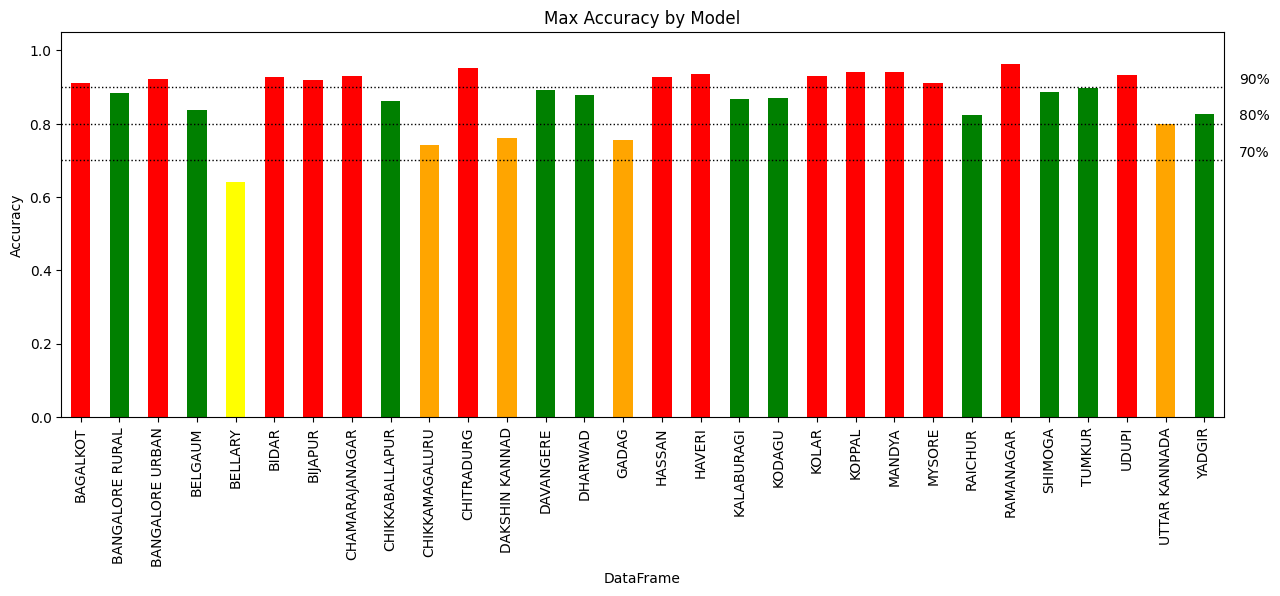

***********---- District Groups by Accuracy ----************
Accuracy <= 70%        : ['BELLARY']
Accuracy 70% - 80%    : ['CHIKKAMAGALURU', 'DAKSHIN KANNAD', 'GADAG', 'UTTAR KANNADA']
Accuracy 80% - 90%    : ['BANGALORE RURAL', 'BELGAUM', 'CHIKKABALLAPUR', 'DAVANGERE', 'DHARWAD', 'KALABURAGI', 'KODAGU', 'RAICHUR', 'SHIMOGA', 'TUMKUR', 'YADGIR']
Accuracy > 90%       : ['BAGALKOT', 'BANGALORE URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR', 'CHITRADURG', 'HASSAN', 'HAVERI', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAMANAGAR', 'UDUPI']


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
res=pd.read_csv('Result_of_ML_Models (Max Accuracy KR).csv')
res.set_index('DataFrame', inplace=True)

# Initialize color list and district groups
colors = []
below_70 = []
btw_70_80 = []
btw_80_90 = []
above_90 = []

# Classify each entry
for district, acc in res['Result'].items():
    if acc <= 0.7:
        colors.append('yellow')
        below_70.append(district)

    elif acc>0.7 and acc <= 0.8:
        colors.append('orange')
        btw_70_80.append(district)

    elif acc>0.8 and acc <= 0.9:
        colors.append('green')
        btw_80_90.append(district)

    else:
        colors.append('red')
        above_90.append(district)

# Plot with the assigned colors
res['Result'].plot(kind='bar', figsize=(15, 5), color=colors)

# Add horizontal dotted lines at 70%, 80%, 90%
for threshold in [0.7, 0.8, 0.9]:
    plt.axhline(y=threshold, color='black', linestyle='dotted', linewidth=1)
    plt.text(x=len(res)-0.1, y=threshold + 0.01, s=f'{int(threshold*100)}%', color='black')

# Label axes and title
plt.ylabel('Accuracy')
plt.title('Max Accuracy by Model')
plt.ylim(0, 1.05)  # Ensure space above 100% for better visibility

plt.show()

# Print grouped districts
print("***********---- District Groups by Accuracy ----************")
print(f"Accuracy <= 70%        : {below_70}")
print(f"Accuracy 70% - 80%    : {btw_70_80}")
print(f"Accuracy 80% - 90%    : {btw_80_90}")
print(f"Accuracy > 90%       : {above_90}")


In [10]:
# Print grouped districts
print(f"Accuracy <= 70%        : {len(below_70)}")
print(f"Accuracy 70% - 80%     : {len(btw_70_80)}")
print(f"Accuracy 80% - 90%     : {len(btw_80_90)}")
print(f"Accuracy > 90%         : {len(above_90)}")

Accuracy <= 70%        : 1
Accuracy 70% - 80%     : 4
Accuracy 80% - 90%     : 11
Accuracy > 90%         : 14


In [11]:
# Print grouped districts
print(f"Accuracy <= 70%        : {((len(below_70) / 30) * 100):.3f}%")
print(f"Accuracy 70% - 80%     : {((len(btw_70_80) / 30) * 100):.3f}%")
print(f"Accuracy 80% - 90%     : {((len(btw_80_90) / 30) * 100):.3f}%")
print(f"Accuracy > 90%         : {((len(above_90) / 30) * 100):.3f}%")


Accuracy <= 70%        : 3.333%
Accuracy 70% - 80%     : 13.333%
Accuracy 80% - 90%     : 36.667%
Accuracy > 90%         : 46.667%


### Sort The District On the Basis of Accuracy

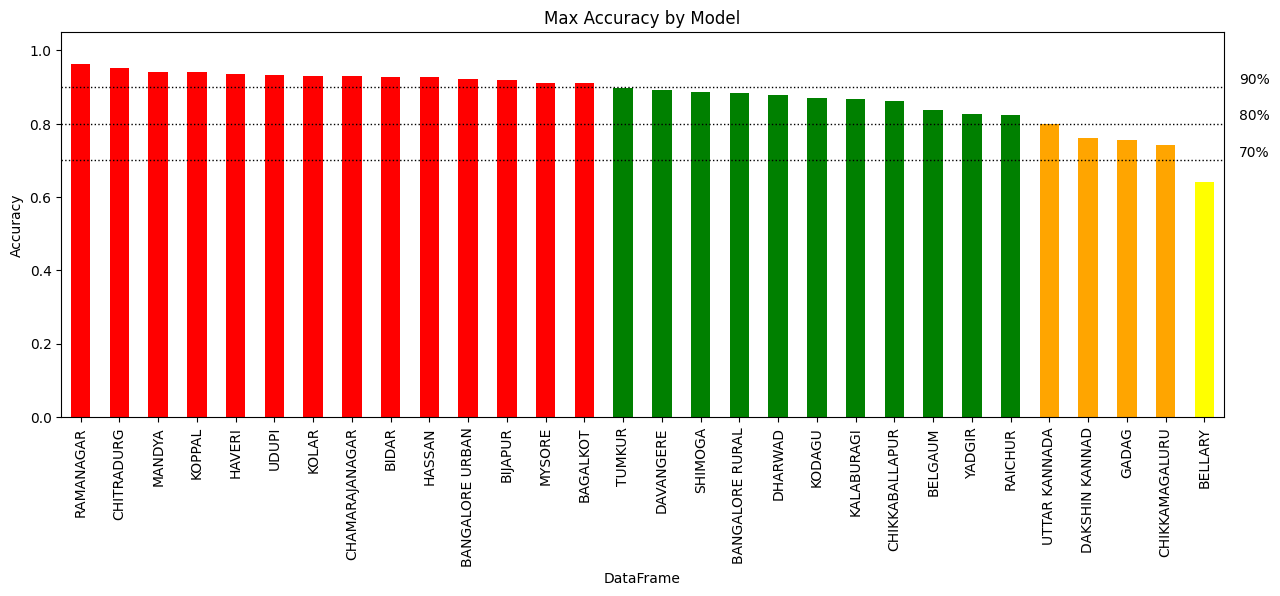

***********---- District Groups by Accuracy ----************
Accuracy <= 70%        : ['BELLARY']
Accuracy 70% - 80%    : ['UTTAR KANNADA', 'DAKSHIN KANNAD', 'GADAG', 'CHIKKAMAGALURU']
Accuracy 80% - 90%    : ['TUMKUR', 'DAVANGERE', 'SHIMOGA', 'BANGALORE RURAL', 'DHARWAD', 'KODAGU', 'KALABURAGI', 'CHIKKABALLAPUR', 'BELGAUM', 'YADGIR', 'RAICHUR']
Accuracy > 90%       : ['RAMANAGAR', 'CHITRADURG', 'MANDYA', 'KOPPAL', 'HAVERI', 'UDUPI', 'KOLAR', 'CHAMARAJANAGAR', 'BIDAR', 'HASSAN', 'BANGALORE URBAN', 'BIJAPUR', 'MYSORE', 'BAGALKOT']


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
res = pd.read_csv('Result_of_ML_Models (Max Accuracy KR).csv')
res.set_index('DataFrame', inplace=True)
res=res[['Result']]
res=res.sort_values(by='Result', ascending=False)

# Initialize color list and district groups
colors = []
below_70 = []
btw_70_80 = []
btw_80_90 = []
above_90 = []

# Classify each entry
for district, acc in res['Result'].items():
    if acc <= 0.7:
        colors.append('yellow')
        below_70.append(district)

    elif acc>0.7 and acc <= 0.8:
        colors.append('orange')
        btw_70_80.append(district)

    elif acc>0.8 and acc <= 0.9:
        colors.append('green')
        btw_80_90.append(district)

    else:
        colors.append('red')
        above_90.append(district)

# Plot with the assigned colors
res['Result'].plot(kind='bar', figsize=(15, 5), color=colors)

# Add horizontal dotted lines at 70%, 80%, 90%
for threshold in [0.7, 0.8, 0.9]:
    plt.axhline(y=threshold, color='black', linestyle='dotted', linewidth=1)
    plt.text(x=len(res)-0.1, y=threshold + 0.01, s=f'{int(threshold*100)}%', color='black')

# Label axes and title
plt.ylabel('Accuracy')
plt.title('Max Accuracy by Model')
plt.ylim(0, 1.05)  # Ensure space above 100% for better visibility

plt.show()

# Print grouped districts
print("***********---- District Groups by Accuracy ----************")
print(f"Accuracy <= 70%        : {below_70}")
print(f"Accuracy 70% - 80%    : {btw_70_80}")
print(f"Accuracy 80% - 90%    : {btw_80_90}")
print(f"Accuracy > 90%       : {above_90}")


In [13]:
import numpy as np
import pandas as pd

# Load data
res = pd.read_csv('Result_of_ML_Models (Max Accuracy KR).csv')
res.set_index('DataFrame', inplace=True)
res=res[['Result']]
res=res.sort_values(by='Result', ascending=False)

acc_rank=[]
for i in range(1,31):
    acc_rank.append(i)

res['Accuracy_Rank']=acc_rank
res

,Result,Accuracy_Rank
DataFrame,,
RAMANAGAR,0.963001,1
CHITRADURG,0.951305,2
MANDYA,0.941503,3
KOPPAL,0.939945,4
HAVERI,0.936055,5
UDUPI,0.933634,6
KOLAR,0.930654,7
CHAMARAJANAGAR,0.930473,8
BIDAR,0.927276,9


## Ranking Based on GDP

In [14]:
gdp_year_wise=pd.read_csv('GDP_Yearly.csv')
gdp_year_wise

,Bagalkot,Bangalore Urban,Bangalore Rural,Belgaum,Bellary,Bidar,Bijapur,Chamarajanagar,Chikkaballapur,Chikkamagaluru,...,Koppal,Mandya,Mysore,Raichur,Ramanagar,Shimoga,Tumkur,Udupi,Uttar Kannada,Yadgir
0,3711497,53745884,2368917,6669748,4841015,2100805,2802480,1731905,2026058,3317724,...,1708870,3708275,5188997,2489219,2358289,4296578,5718626,3939123,2684980,1398662
1,3961712,59399275,2471161,6876354,5232733,2353241,3122138,1875083,2063461,3897074,...,1905224,3977203,5662629,2797749,2572817,4593381,6072646,4190294,2898511,1651457
2,3948470,61023808,2413990,6843209,5184813,2332241,3079997,1855072,2179905,3900747,...,1928350,4065379,5706051,2795247,2551820,4984443,6246999,4281500,2903389,1596735
3,4680924,72699220,3801889,8084000,6422744,2778112,3859461,2244294,2746883,4637352,...,2379669,4771340,6862922,3316211,2993148,5824958,7471012,5245069,3462734,1871186
4,5309406,85915423,3559903,9144867,4553583,3277689,4648289,2606426,3167074,5289281,...,2680369,5331817,8067565,4022567,3379913,6302816,8262617,5923642,3978261,2275351
5,5809406,90915742,3801874,9807891,6287295,3475981,5078456,3057846,3586175,5687412,...,2845761,5671236,8506486,4452589,3674123,6702831,8974575,6508741,4358136,2575481


In [15]:
gdp_year=gdp_year_wise.iloc[0:6]
ranked_gdp_mean=dict(gdp_year.mean(axis=0))
ranked_gdp_mean

{'Bagalkot': 4570235.833333333,
 'Bangalore Urban': 70616558.66666667,
 'Bangalore Rural': 3069622.3333333335,
 'Belgaum': 7904344.833333333,
 'Bellary': 5420363.833333333,
 'Bidar': 2719678.1666666665,
 'Bijapur': 3765136.8333333335,
 'Chamarajanagar': 2228437.6666666665,
 'Chikkaballapur': 2628259.3333333335,
 'Chikkamagaluru': 4454931.666666667,
 'Chitradurg': 3241308.5,
 'Dakshin Kannad': 10631459.666666666,
 'Davangere': 3546108.0,
 'Dharwad': 4479550.833333333,
 'Gadag': 1952767.8333333333,
 'Kalaburagi': 3825426.3333333335,
 'Hassan': 4428751.666666667,
 'Haveri': 2725434.8333333335,
 'Kodagu': 1490437.3333333333,
 'Kolar': 3157385.3333333335,
 'Koppal': 2241373.8333333335,
 'Mandya': 4587541.666666667,
 'Mysore': 6665775.0,
 'Raichur': 3312263.6666666665,
 'Ramanagar': 2921685.0,
 'Shimoga': 5450834.5,
 'Tumkur': 7124412.5,
 'Udupi': 5014728.166666667,
 'Uttar Kannada': 3381001.8333333335,
 'Yadgir': 1894812.0}

In [16]:
# Sort the dictionary by GDP values in descending order
sorted_districts = sorted(ranked_gdp_mean.items(), key=lambda item: item[1], reverse=True)

# Assign ranks from 1 to 33
ranked_districts = {district: rank for rank, (district, _) in enumerate(sorted_districts, start=1)}

# Print the ranked districts
print(ranked_districts)

{'Bangalore Urban': 1, 'Dakshin Kannad': 2, 'Belgaum': 3, 'Tumkur': 4, 'Mysore': 5, 'Shimoga': 6, 'Bellary': 7, 'Udupi': 8, 'Mandya': 9, 'Bagalkot': 10, 'Dharwad': 11, 'Chikkamagaluru': 12, 'Hassan': 13, 'Kalaburagi': 14, 'Bijapur': 15, 'Davangere': 16, 'Uttar Kannada': 17, 'Raichur': 18, 'Chitradurg': 19, 'Kolar': 20, 'Bangalore Rural': 21, 'Ramanagar': 22, 'Haveri': 23, 'Bidar': 24, 'Chikkaballapur': 25, 'Koppal': 26, 'Chamarajanagar': 27, 'Gadag': 28, 'Yadgir': 29, 'Kodagu': 30}


In [17]:
## Make All the Keys to be Upper Case
ranked_districts = {k.upper(): v for k, v in ranked_districts.items()}
ranked_districts

{'BANGALORE URBAN': 1,
 'DAKSHIN KANNAD': 2,
 'BELGAUM': 3,
 'TUMKUR': 4,
 'MYSORE': 5,
 'SHIMOGA': 6,
 'BELLARY': 7,
 'UDUPI': 8,
 'MANDYA': 9,
 'BAGALKOT': 10,
 'DHARWAD': 11,
 'CHIKKAMAGALURU': 12,
 'HASSAN': 13,
 'KALABURAGI': 14,
 'BIJAPUR': 15,
 'DAVANGERE': 16,
 'UTTAR KANNADA': 17,
 'RAICHUR': 18,
 'CHITRADURG': 19,
 'KOLAR': 20,
 'BANGALORE RURAL': 21,
 'RAMANAGAR': 22,
 'HAVERI': 23,
 'BIDAR': 24,
 'CHIKKABALLAPUR': 25,
 'KOPPAL': 26,
 'CHAMARAJANAGAR': 27,
 'GADAG': 28,
 'YADGIR': 29,
 'KODAGU': 30}

In [18]:
Gdp_rank_mean=[]

for dist in list(res.index):
    Gdp_rank_mean.append(ranked_districts[dist])

res['GDP_Rank_Mean']=Gdp_rank_mean
res

,Result,Accuracy_Rank,GDP_Rank_Mean
DataFrame,,,
RAMANAGAR,0.963001,1,22
CHITRADURG,0.951305,2,19
MANDYA,0.941503,3,9
KOPPAL,0.939945,4,26
HAVERI,0.936055,5,23
UDUPI,0.933634,6,8
KOLAR,0.930654,7,20
CHAMARAJANAGAR,0.930473,8,27
BIDAR,0.927276,9,24


### Cluster Based on GDP Rank Mean

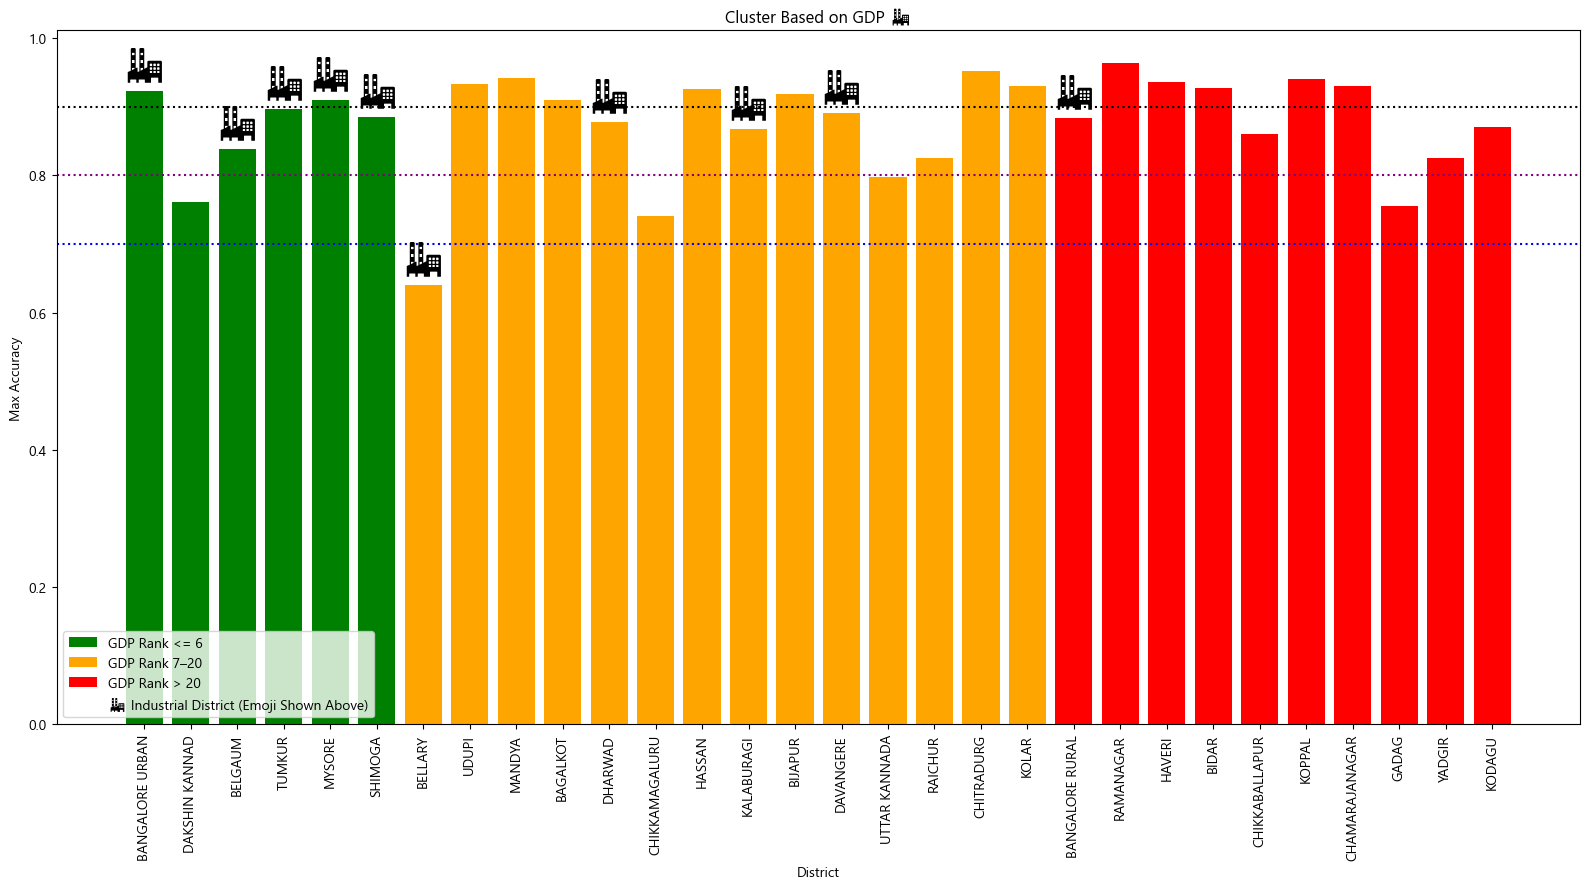

🟩 Green Cluster (Top 6 GDP Rank): ['BANGALORE URBAN', 'DAKSHIN KANNAD', 'BELGAUM', 'TUMKUR', 'MYSORE', 'SHIMOGA']
🟧 Orange Cluster (GDP Rank 7-20): ['BELLARY', 'UDUPI', 'MANDYA', 'BAGALKOT', 'DHARWAD', 'CHIKKAMAGALURU', 'HASSAN', 'KALABURAGI', 'BIJAPUR', 'DAVANGERE', 'UTTAR KANNADA', 'RAICHUR', 'CHITRADURG', 'KOLAR']
🟥 Red Cluster (GDP Rank > 20): ['BANGALORE RURAL', 'RAMANAGAR', 'HAVERI', 'BIDAR', 'CHIKKABALLAPUR', 'KOPPAL', 'CHAMARAJANAGAR', 'GADAG', 'YADGIR', 'KODAGU']


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set the font globally to Segoe UI Emoji (supports 🏭 and other emojis)
plt.rcParams['font.family'] = 'Segoe UI Emoji'

# Example DataFrame (replace this with your actual `res` DataFrame)
# Make sure 'Population' and 'Result' columns are present
# res = pd.read_csv('your_file.csv')  # Uncomment if reading from file

# Clean column names and sort by Population
res.columns = res.columns.str.strip()
res = res.sort_values("GDP_Rank_Mean", ascending=True)

# Lists to store district names by cluster
cluster_green = []
cluster_orange = []
cluster_red = []

# Function to assign color and collect district names into clusters
def get_cluster_color_and_collect(rank, district):
    if rank <= 6:
        cluster_green.append(district)
        return 'green'
    elif rank <= 20:
        cluster_orange.append(district)
        return 'orange'
    else:
        cluster_red.append(district)
        return 'red'

# Assign colors based on rank and collect districts
colors = []
for idx, (district, row) in enumerate(res.iterrows(), start=1):
    color = get_cluster_color_and_collect(idx, district)
    colors.append(color)

# Industrial districts
industrial_districts = [
    "Bangalore Urban",
    "Bangalore Rural",
    "Tumkur",
    "Mysore",
    "Dharwad",
    "Belgaum",
    "Kalaburagi",
    "Bellary",
    "Shimoga",
    "Davangere"
]

# Plotting
plt.figure(figsize=(16, 9))
bars = plt.bar(res.index, res['Result'], color=colors)

# Add 🏭 emoji above industrial district bars
for i, (label, bar) in enumerate(zip(res.index, bars)):
    if label.upper() in [d.upper() for d in industrial_districts]:
        plt.text(i, bar.get_height() + 0.01, '🏭', ha='center', va='bottom', fontsize=25)

# Add accuracy threshold lines
plt.axhline(0.7, color='blue', linestyle='dotted', linewidth=1.5, label='70% Accuracy')
plt.axhline(0.8, color='purple', linestyle='dotted', linewidth=1.5, label='80% Accuracy')
plt.axhline(0.9, color='black', linestyle='dotted', linewidth=1.5, label='90% Accuracy')

# X-axis and labels
plt.xticks(ticks=range(len(res)), labels=res.index, rotation=90)
plt.xlabel("District")
plt.ylabel("Max Accuracy")
plt.title("Cluster Based on GDP 🏭")

# Custom Legend
legend_elements = [
    Patch(facecolor='green', label='GDP Rank <= 6'),
    Patch(facecolor='orange', label='GDP Rank 7–20'),
    Patch(facecolor='red', label='GDP Rank > 20'),
    Patch(facecolor='white', edgecolor='black', label='🏭 Industrial District (Emoji Shown Above)', linewidth=0)
]
plt.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
plt.show()

# Print district names by cluster
print("🟩 Green Cluster (Top 6 GDP Rank):", cluster_green)
print("🟧 Orange Cluster (GDP Rank 7-20):", cluster_orange)
print("🟥 Red Cluster (GDP Rank > 20):", cluster_red)


### Cluster Based on Population

In [20]:
import pandas as pd
pop=pd.read_csv('population.csv')
pop=pop.iloc[1:]
pop=pop.set_index('District Name')
pop

,Sl. No.,District,Total Population,Rank
District Name,,,,
BANGALORE URBAN,1.0,Bangalore Urban,9588910.0,1.0
BELGAUM,2.0,Belgaum,4778439.0,2.0
MYSORE,3.0,Mysore,2994744.0,3.0
TUMKUR,4.0,Tumkur,2681449.0,4.0
KALABURAGI,5.0,Kalaburagi,2564892.0,5.0
BELLARY,6.0,Bellary,2532383.0,6.0
BIJAPUR,7.0,Bijapur,2175102.0,7.0
DAKSHIN KANNAD,8.0,Dakshin Kannad,2083625.0,8.0
DAVANGERE,9.0,Davangere,1946905.0,9.0


In [21]:
pop.loc['BELGAUM']['Rank']

2.0

In [22]:
pop_rank=[]
res
for dis in list(res.index):
    pop_rank.append(pop.loc[dis]['Rank'])

res['Population_Rank']=pop_rank
res

,Result,Accuracy_Rank,GDP_Rank_Mean,Population_Rank
DataFrame,,,,
BANGALORE URBAN,0.922095,11,1,1.0
DAKSHIN KANNAD,0.760580,27,2,8.0
BELGAUM,0.838178,23,3,2.0
TUMKUR,0.895971,15,4,4.0
MYSORE,0.909615,13,5,3.0
SHIMOGA,0.884651,17,6,15.0
BELLARY,0.640429,30,7,6.0
UDUPI,0.933634,6,8,23.0
MANDYA,0.941503,3,9,13.0


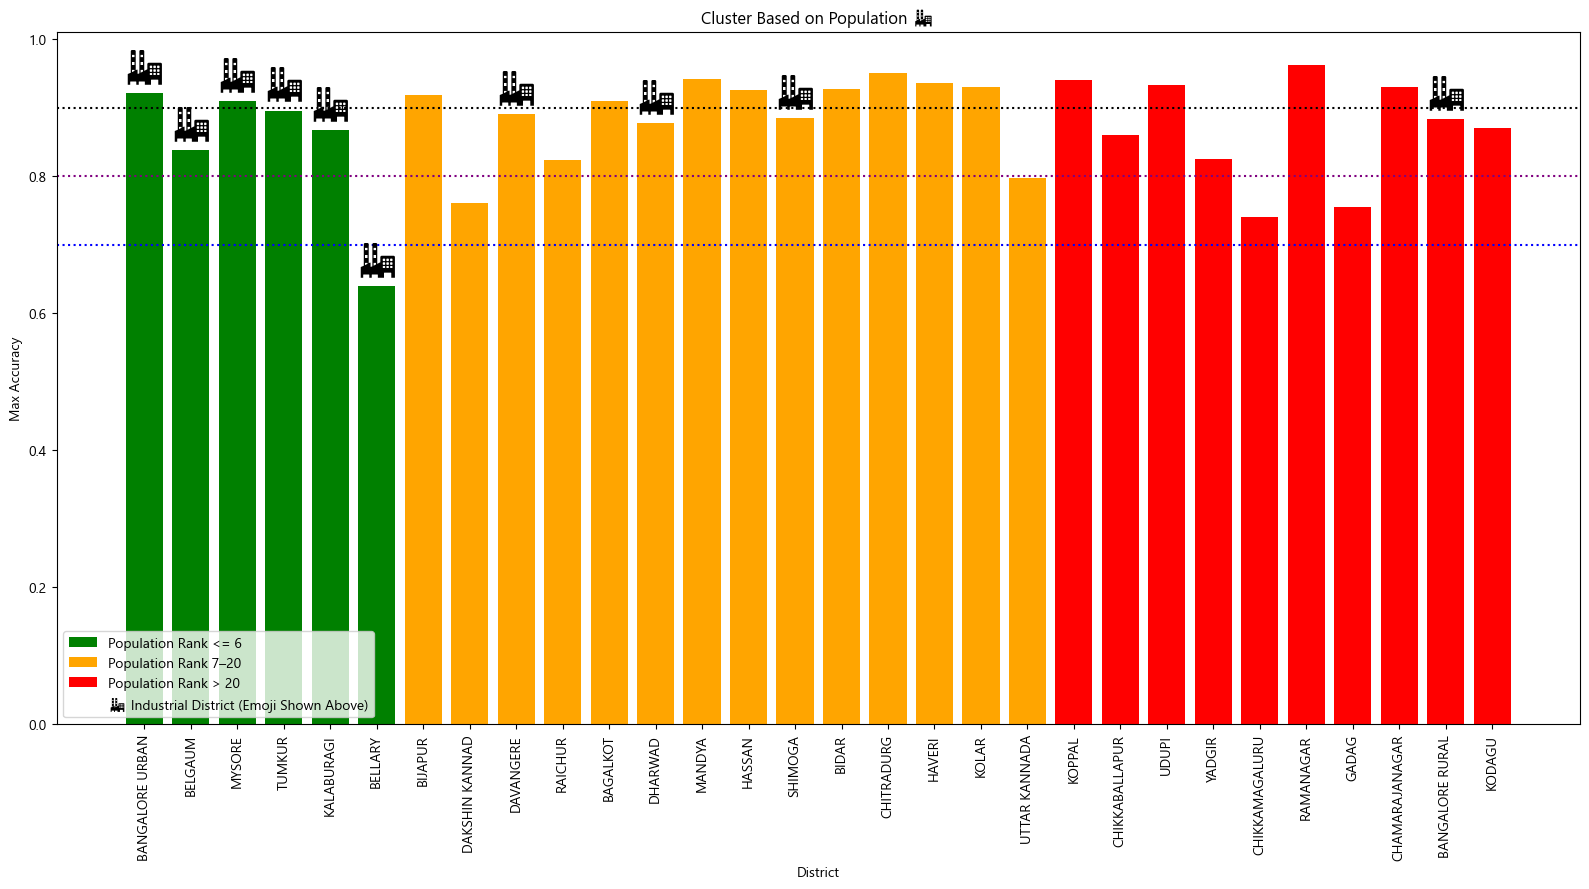

🟩 Green Cluster (Top 6 Population Rank): ['BANGALORE URBAN', 'BELGAUM', 'MYSORE', 'TUMKUR', 'KALABURAGI', 'BELLARY']
🟧 Orange Cluster (Population Rank 7-20): ['BIJAPUR', 'DAKSHIN KANNAD', 'DAVANGERE', 'RAICHUR', 'BAGALKOT', 'DHARWAD', 'MANDYA', 'HASSAN', 'SHIMOGA', 'BIDAR', 'CHITRADURG', 'HAVERI', 'KOLAR', 'UTTAR KANNADA']
🟥 Red Cluster (Population Rank > 20): ['KOPPAL', 'CHIKKABALLAPUR', 'UDUPI', 'YADGIR', 'CHIKKAMAGALURU', 'RAMANAGAR', 'GADAG', 'CHAMARAJANAGAR', 'BANGALORE RURAL', 'KODAGU']


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set the font globally to Segoe UI Emoji (supports 🏭 and other emojis)
plt.rcParams['font.family'] = 'Segoe UI Emoji'

# Example DataFrame (replace this with your actual `res` DataFrame)
# Make sure 'Population' and 'Result' columns are present
# res = pd.read_csv('your_file.csv')  # Uncomment if reading from file

# Clean column names and sort by Population
res.columns = res.columns.str.strip()
res = res.sort_values("Population_Rank", ascending=True)

# Lists to store district names by cluster
cluster_green = []
cluster_orange = []
cluster_red = []

# Function to assign color and collect district names into clusters
def get_cluster_color_and_collect(rank, district):
    if rank <= 6:
        cluster_green.append(district)
        return 'green'
    elif rank <= 20:
        cluster_orange.append(district)
        return 'orange'
    else:
        cluster_red.append(district)
        return 'red'

# Assign colors based on rank and collect districts
colors = []
for idx, (district, row) in enumerate(res.iterrows(), start=1):
    color = get_cluster_color_and_collect(idx, district)
    colors.append(color)

# Industrial districts
industrial_districts = [
    "Bangalore Urban",
    "Bangalore Rural",
    "Tumkur",
    "Mysore",
    "Dharwad",
    "Belgaum",
    "Kalaburagi",
    "Bellary",
    "Shimoga",
    "Davangere"
]

# Plotting
plt.figure(figsize=(16, 9))
bars = plt.bar(res.index, res['Result'], color=colors)

# Add 🏭 emoji above industrial district bars
for i, (label, bar) in enumerate(zip(res.index, bars)):
    if label.upper() in [d.upper() for d in industrial_districts]:
        plt.text(i, bar.get_height() + 0.01, '🏭', ha='center', va='bottom', fontsize=25)

# Add accuracy threshold lines
plt.axhline(0.7, color='blue', linestyle='dotted', linewidth=1.5, label='70% Accuracy')
plt.axhline(0.8, color='purple', linestyle='dotted', linewidth=1.5, label='80% Accuracy')
plt.axhline(0.9, color='black', linestyle='dotted', linewidth=1.5, label='90% Accuracy')

# X-axis and labels
plt.xticks(ticks=range(len(res)), labels=res.index, rotation=90)
plt.xlabel("District")
plt.ylabel("Max Accuracy")
plt.title("Cluster Based on Population 🏭")

# Custom Legend
legend_elements = [
    Patch(facecolor='green', label='Population Rank <= 6'),
    Patch(facecolor='orange', label='Population Rank 7–20'),
    Patch(facecolor='red', label='Population Rank > 20'),
    Patch(facecolor='white', edgecolor='black', label='🏭 Industrial District (Emoji Shown Above)', linewidth=0)
]
plt.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
plt.show()

# Print district names by cluster
print("🟩 Green Cluster (Top 6 Population Rank):", cluster_green)
print("🟧 Orange Cluster (Population Rank 7-20):", cluster_orange)
print("🟥 Red Cluster (Population Rank > 20):", cluster_red)


In [24]:
res.corr(method='spearman')

,Result,Accuracy_Rank,GDP_Rank_Mean,Population_Rank
Result,1.000000,-1.000000,0.112792,0.089210
Accuracy_Rank,-1.000000,1.000000,-0.112792,-0.089210
GDP_Rank_Mean,0.112792,-0.112792,1.000000,0.769077
Population_Rank,0.089210,-0.089210,0.769077,1.000000


In [25]:
res.corr(method='pearson')

,Result,Accuracy_Rank,GDP_Rank_Mean,Population_Rank
Result,1.000000,-0.904774,0.138241,0.059922
Accuracy_Rank,-0.904774,1.000000,-0.112792,-0.089210
GDP_Rank_Mean,0.138241,-0.112792,1.000000,0.769077
Population_Rank,0.059922,-0.089210,0.769077,1.000000


## Accuracy on GDP or Population Cluster

Here Corr. b/w Population and GDP are High so we analysis for only one

In [28]:
dataframes_pca[2]['District'].iloc[0].upper()


'BANGALORE URBAN'

In [38]:
import pandas as pd

# Initialize an empty list to store updated DataFrames
merged_dfs_green = []
merged_dfs_orange = []
merged_dfs_red=[]

for i, df in enumerate(dataframes_pca):
    
    df=df.copy()
    df['Identity']=i
    df['GDP_Output'] = gdp[districts[i].upper()]

    if dataframes_pca[i]['District'].iloc[0].upper() in cluster_green:
        merged_dfs_green.append(df)

    elif dataframes_pca[i]['District'].iloc[0].upper() in cluster_orange:
        merged_dfs_orange.append(df)

    else:
        merged_dfs_red.append(df)
    

# Concatenate all DataFrames into one
final_merged_df_green = pd.concat(merged_dfs_green, ignore_index=True)
final_merged_df_orange = pd.concat(merged_dfs_orange, ignore_index=True)
final_merged_df_red = pd.concat(merged_dfs_red, ignore_index=True)



In [39]:
# Shuffle the DataFrame
final_merged_df_green = final_merged_df_green.sample(frac=1, random_state=42).reset_index(drop=True)
final_merged_df_orange = final_merged_df_orange.sample(frac=1, random_state=42).reset_index(drop=True)
final_merged_df_red = final_merged_df_red.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
final_merged_df_green.shape,final_merged_df_orange.shape,final_merged_df_red.shape

((360, 63), (840, 63), (600, 63))

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np
    
def accuracy_cluster(merge_df):
        # Features and Target 
        X = merge_df.drop(columns=['GDP_Output', 'District'])
        y = merge_df['GDP_Output']
        states = merge_df['District']

        # Dictionary to store model results
        model_results = {}

        # Limit for the number of bars to display
        max_bars = 60

        # List of models
        models = {
            "RandomForest": RandomForestRegressor(n_jobs=-1, random_state=42),
            "GradientBoost": GradientBoostingRegressor(random_state=42),
            "XGBoost": XGBRegressor(random_state=42, verbosity=0),
            "AdaBoost": AdaBoostRegressor(random_state=42),
            "ExtraTrees": ExtraTreesRegressor(random_state=42)
        }

        # K-Fold setup
        kf = KFold(n_splits=8, shuffle=True, random_state=102)

        # Training and evaluating each model
        for model_name, model in models.items():
            try:
                r2_scores = []
                fold_results = {}  # Store predictions and test values for each fold

                for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
                    # Split data
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    states_test = states.iloc[test_idx]

                    # Fit the model
                    model.fit(X_train, y_train)

                    # Predict on test data
                    y_pred = model.predict(X_test)

                    # Calculate R2 score
                    r2 = r2_score(y_test, y_pred)
                    r2_scores.append(r2)

                    # Store the fold results
                    fold_results[fold] = {
                        "r2_score": r2,
                        "states_test": states_test,
                        "y_test": y_test,
                        "y_pred": y_pred
                    }

                # Find the fold with maximum R2 score
                best_fold = max(fold_results, key=lambda x: fold_results[x]["r2_score"])
                best_fold_data = fold_results[best_fold]
                
                print(f"{model_name}: Best Fold = {best_fold + 1} with R2 Score = {best_fold_data['r2_score']:.4f}")

                # Limit data to max_bars
                limited_states = best_fold_data["states_test"][:max_bars]
                limited_y_test = best_fold_data["y_test"][:max_bars]
                limited_y_pred = best_fold_data["y_pred"][:max_bars]

                # Plot side-by-side bar chart for Actual vs Predicted
                plt.figure(figsize=(14, 8))
                x = np.arange(len(limited_states))
                width = 0.4

                plt.bar(x - width / 2, limited_y_test, width, label="Actual GDP")
                plt.bar(x + width / 2, limited_y_pred, width, label="Predicted GDP")

                plt.ylabel("GDP")
                plt.title(f"Actual vs Predicted GDP - {model_name} (Best Fold {best_fold + 1})")
                plt.xticks(ticks=x, labels=limited_states, rotation=90)
                plt.legend()
                plt.tight_layout()
                plt.show()

                # Store the average R2 score across all folds
                avg_r2 = np.mean(r2_scores)
                model_results[model_name] = {"Mean_R2_Score": avg_r2}

            except Exception as e:
                print(f"Error with {model_name}: {e}")

        # Convert results to DataFrame for easy comparison
        results_df = pd.DataFrame.from_dict(model_results, orient='index').reset_index()
        results_df.rename(columns={'index': 'Model'}, inplace=True)

        print("\nSummary of Model Results:")
        print(results_df)
        

RandomForest: Best Fold = 5 with R2 Score = 0.9950


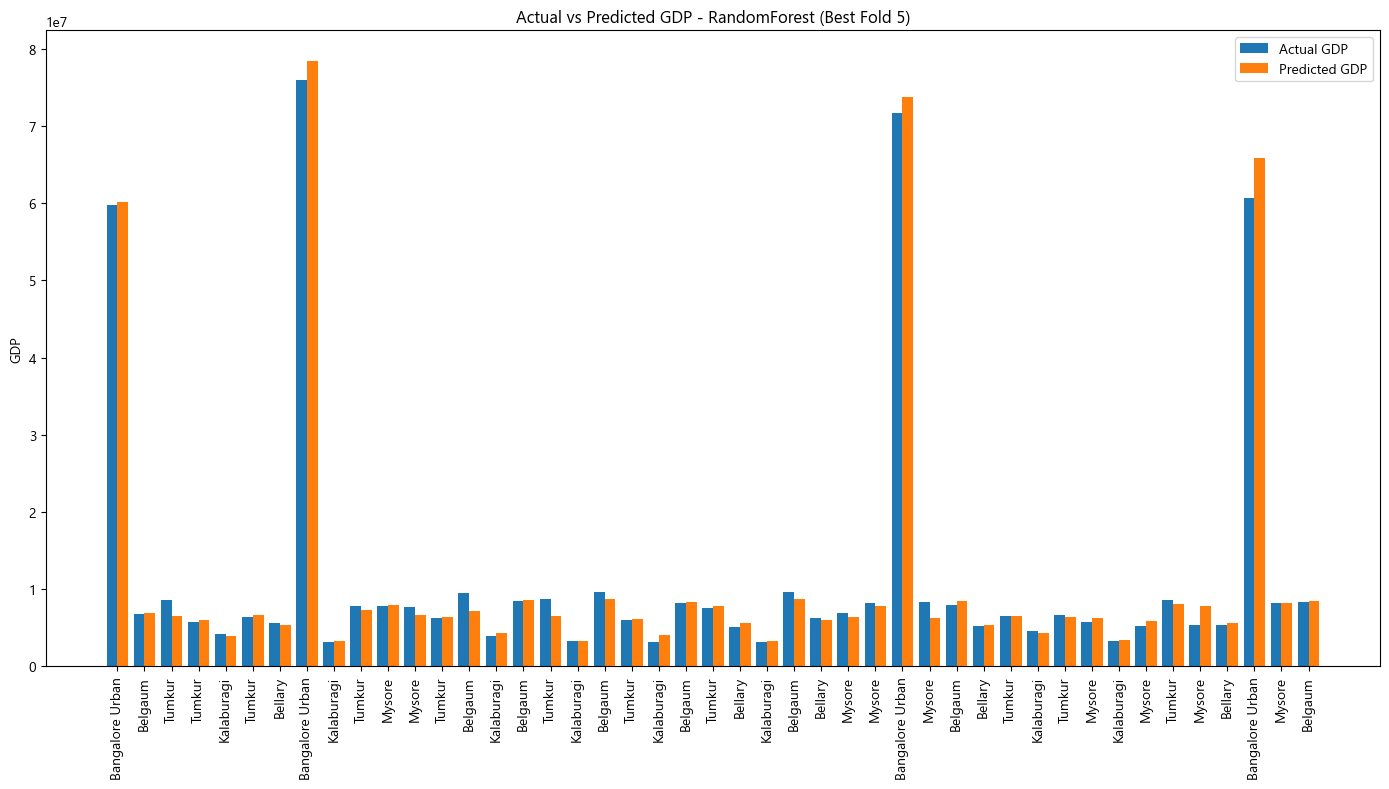

GradientBoost: Best Fold = 4 with R2 Score = 0.9957


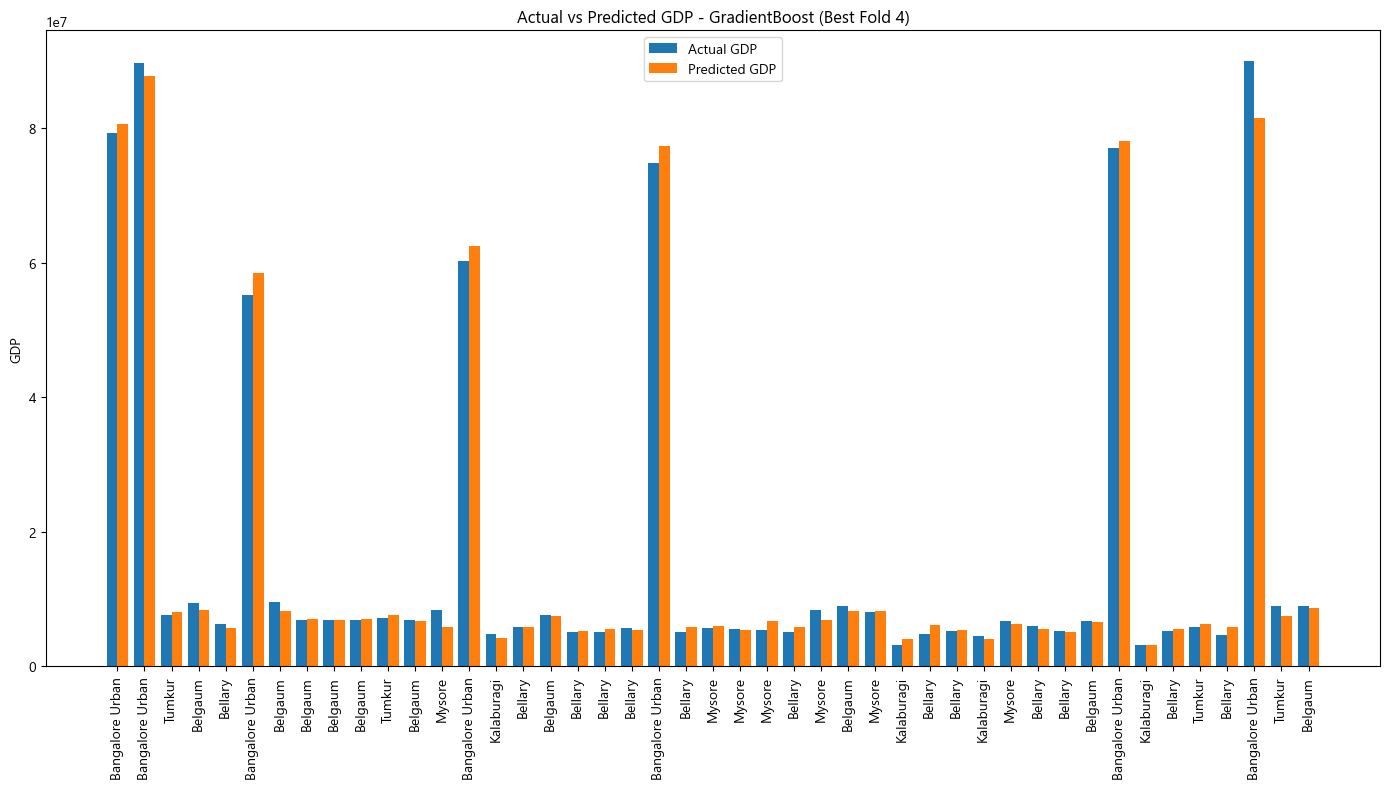

XGBoost: Best Fold = 1 with R2 Score = 0.9934


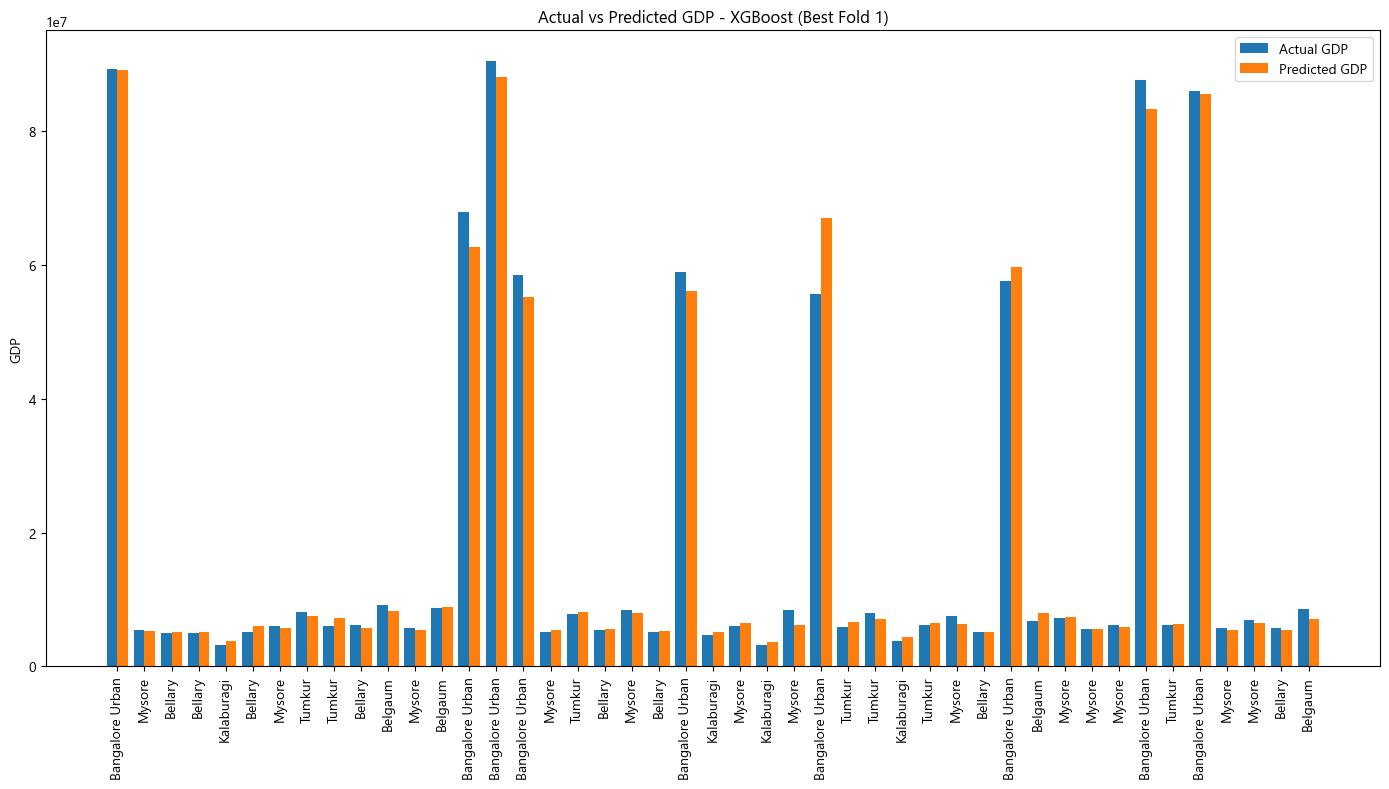

AdaBoost: Best Fold = 7 with R2 Score = 0.9919


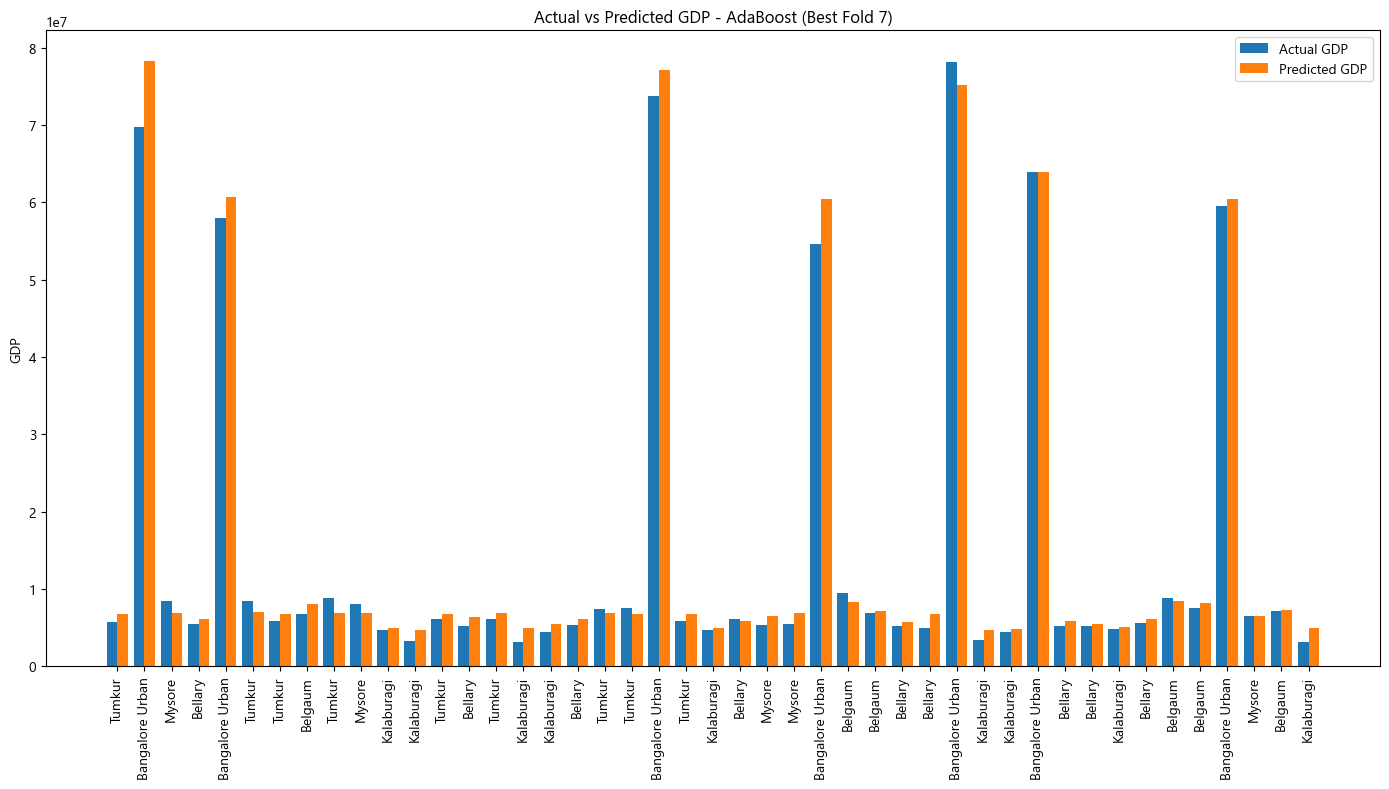

ExtraTrees: Best Fold = 4 with R2 Score = 0.9957


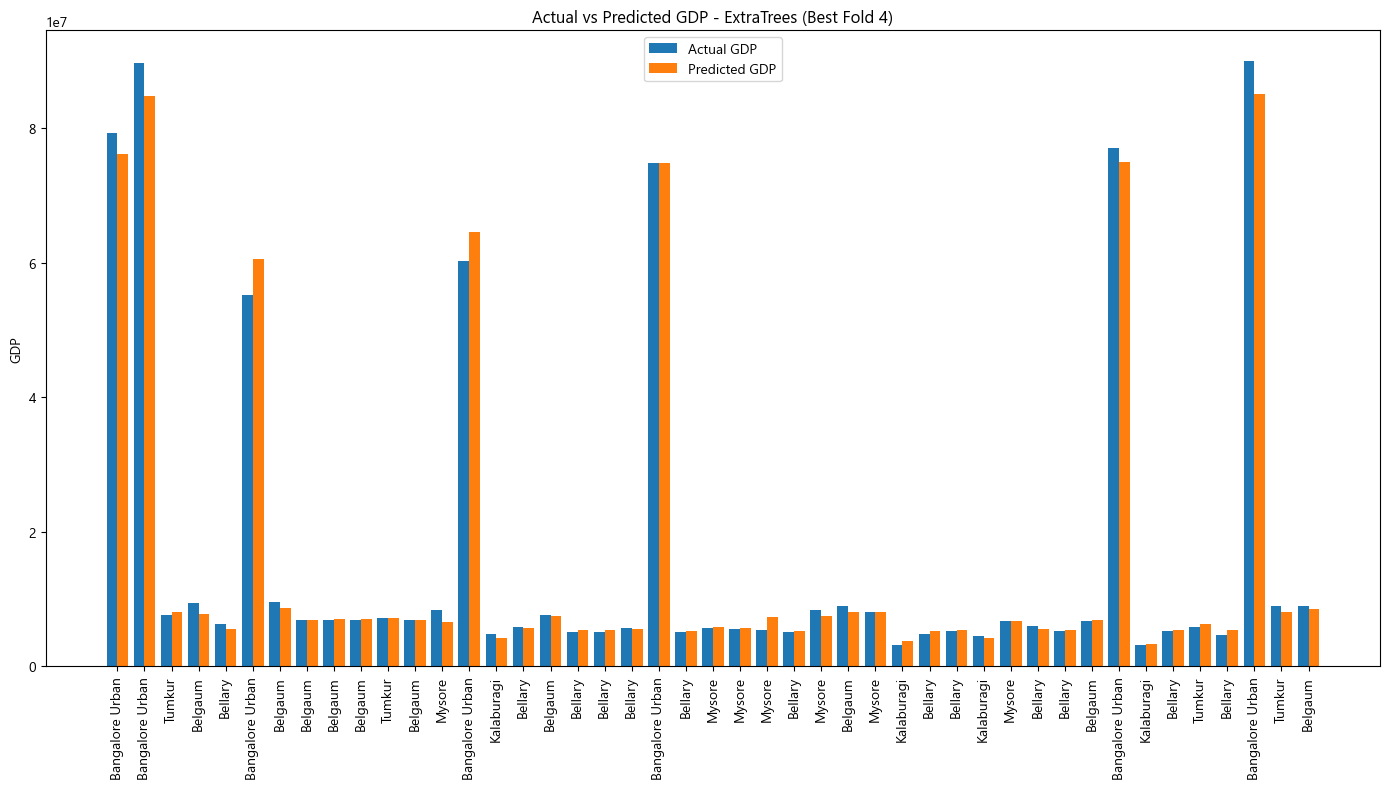


Summary of Model Results:
           Model  Mean_R2_Score
0   RandomForest       0.980035
1  GradientBoost       0.983548
2        XGBoost       0.979963
3       AdaBoost       0.981514
4     ExtraTrees       0.985504


In [45]:
accuracy_cluster(final_merged_df_green)

RandomForest: Best Fold = 6 with R2 Score = 0.9520


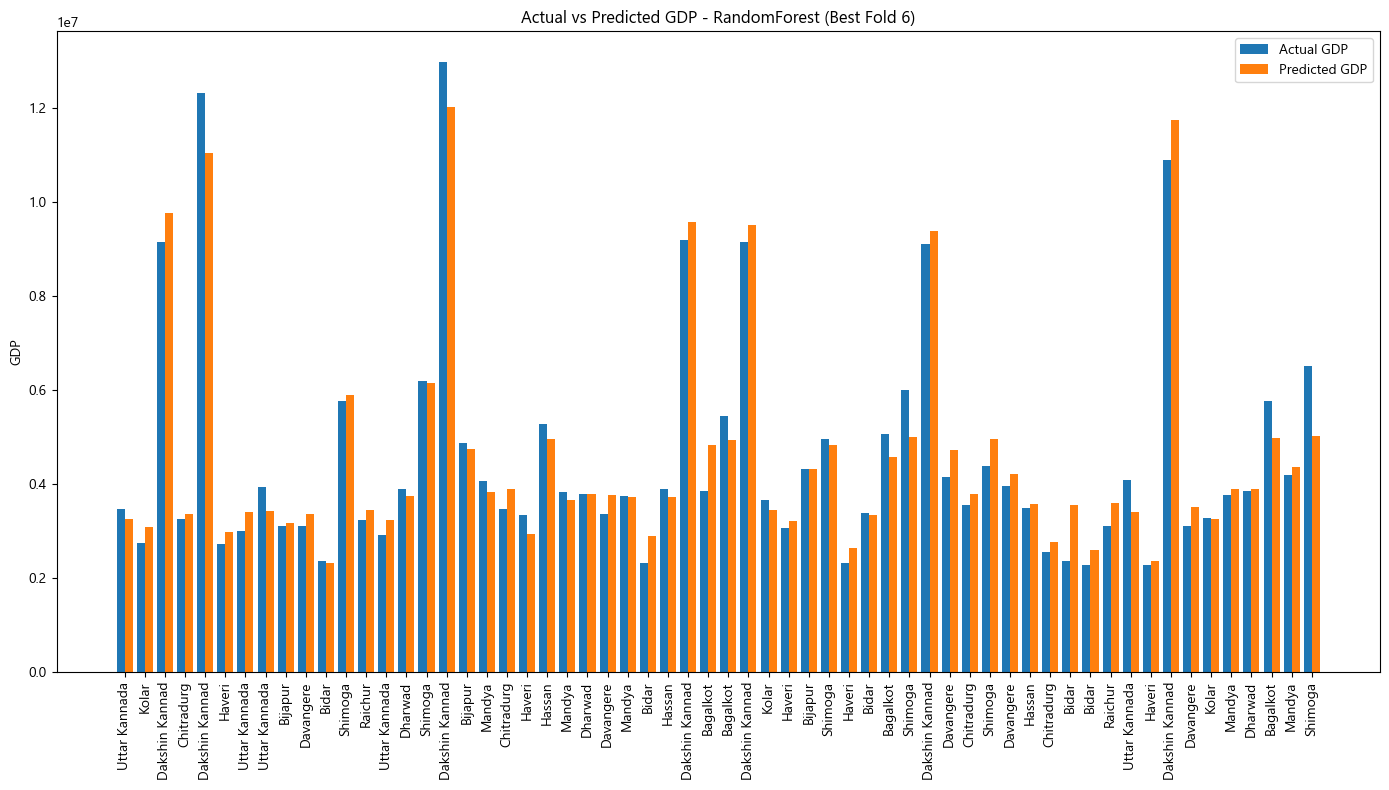

GradientBoost: Best Fold = 6 with R2 Score = 0.9505


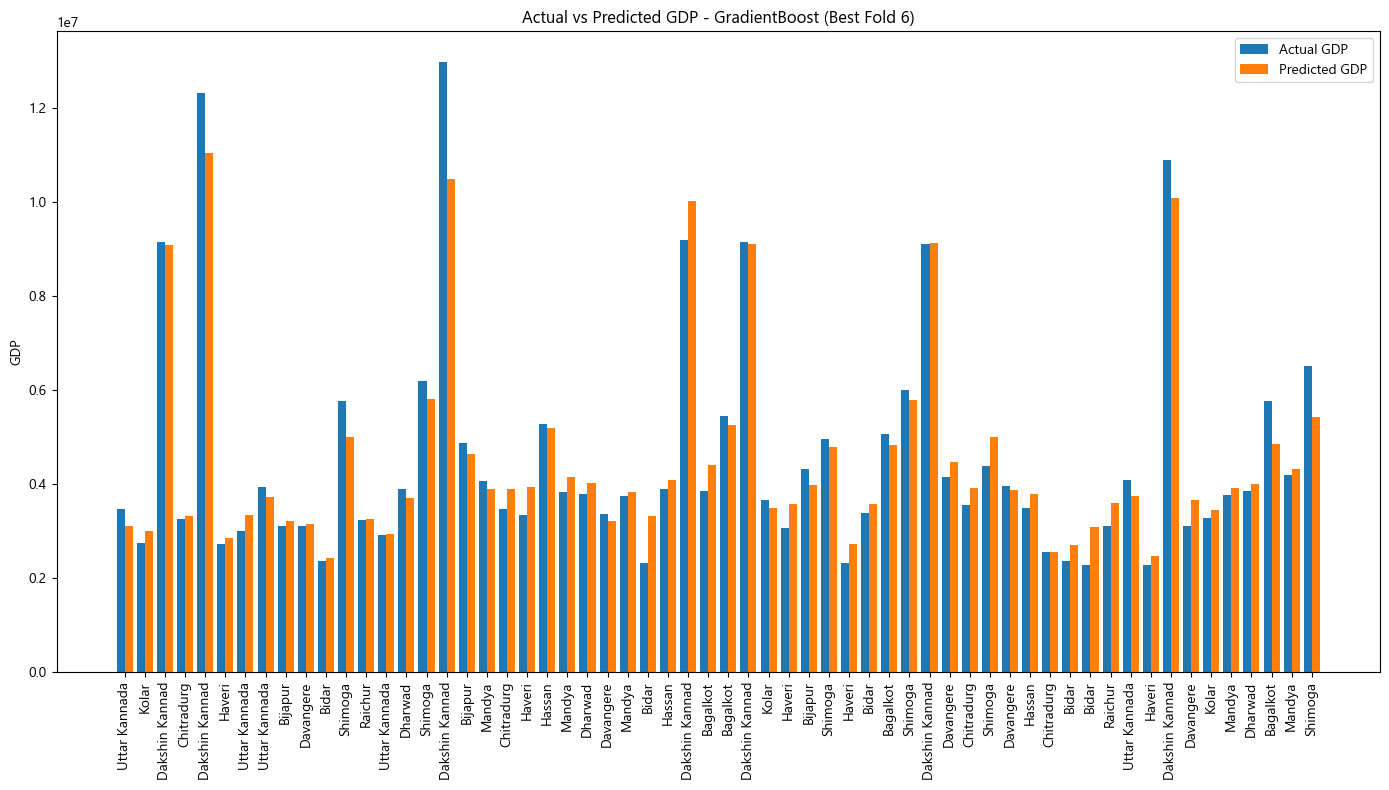

XGBoost: Best Fold = 6 with R2 Score = 0.9663


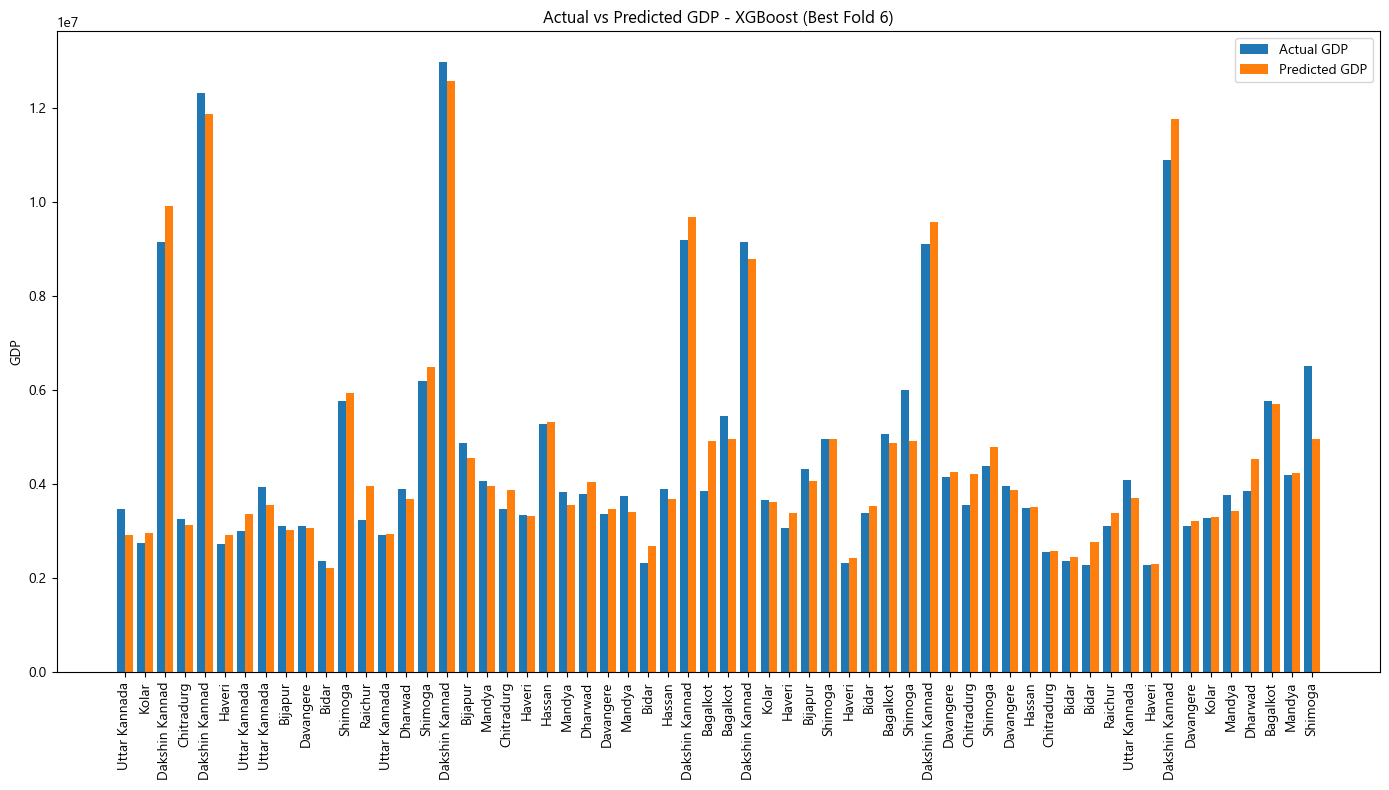

AdaBoost: Best Fold = 4 with R2 Score = 0.9175


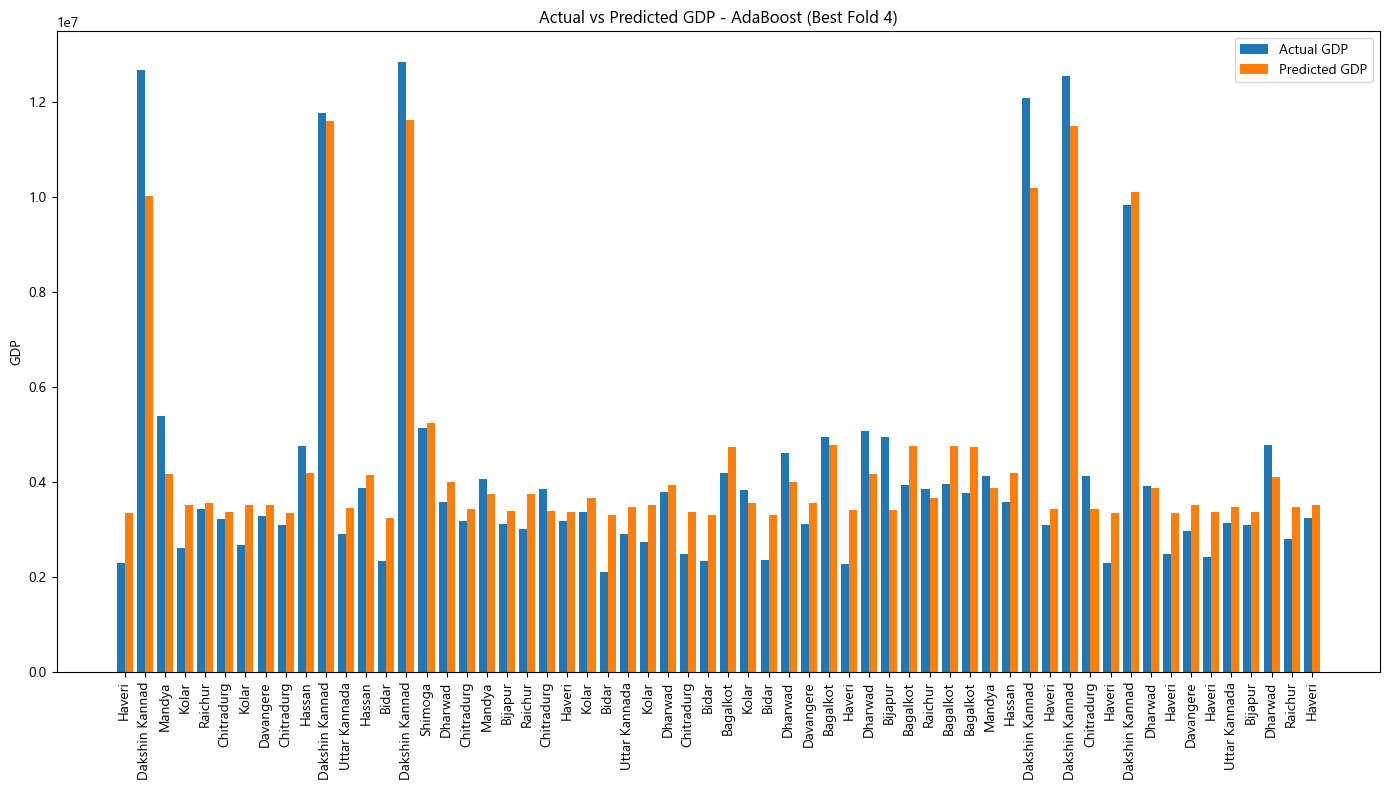

ExtraTrees: Best Fold = 6 with R2 Score = 0.9702


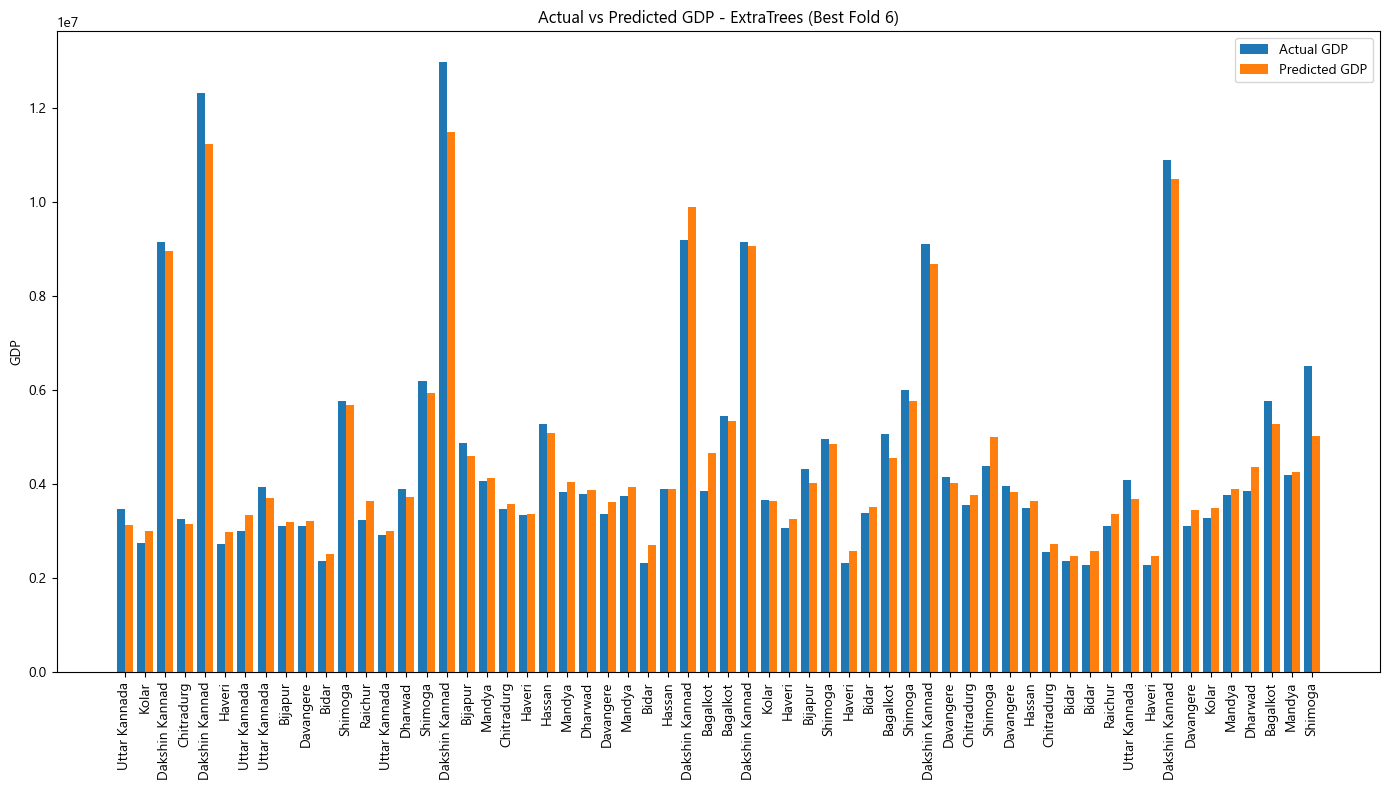


Summary of Model Results:
           Model  Mean_R2_Score
0   RandomForest       0.868995
1  GradientBoost       0.899669
2        XGBoost       0.887245
3       AdaBoost       0.821710
4     ExtraTrees       0.931538


In [46]:
accuracy_cluster(final_merged_df_orange)

RandomForest: Best Fold = 8 with R2 Score = 0.9396


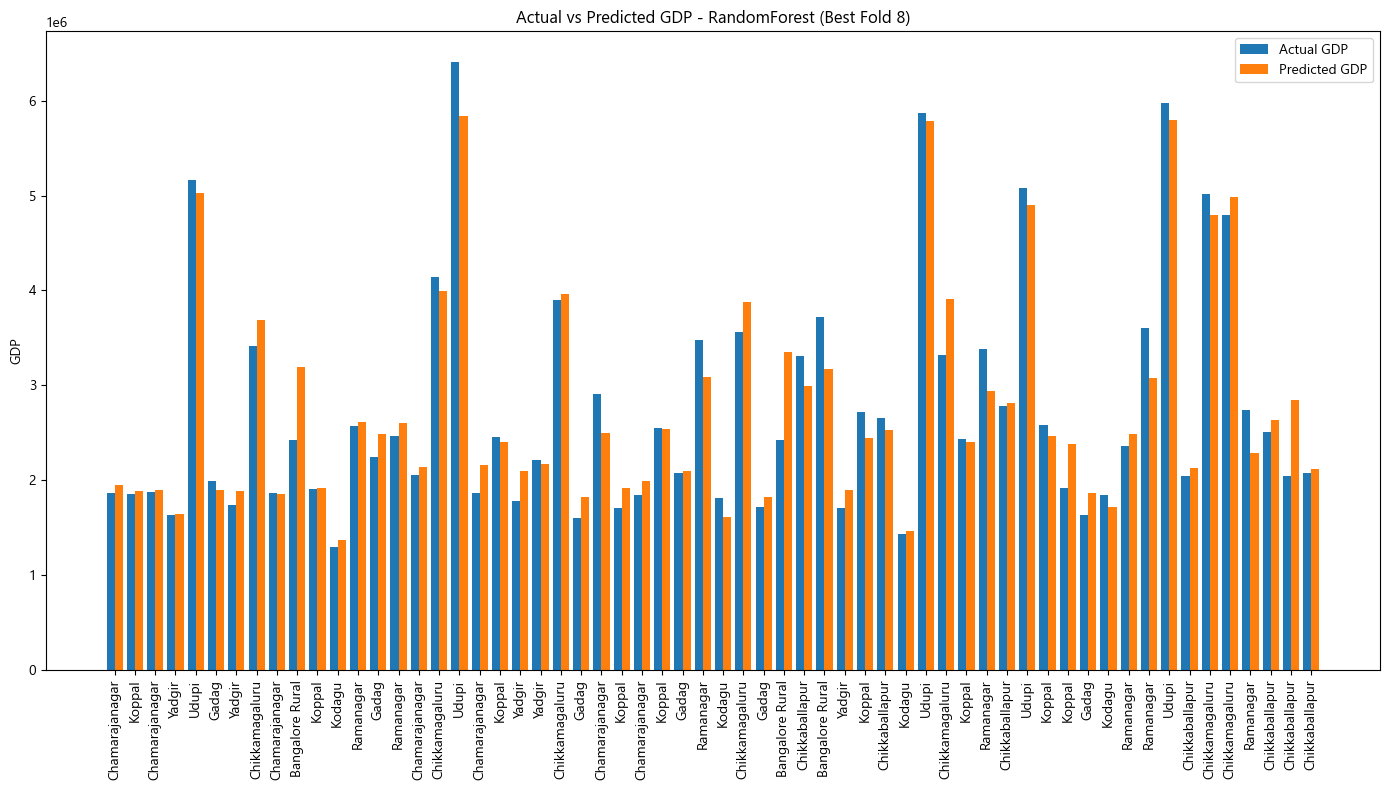

GradientBoost: Best Fold = 6 with R2 Score = 0.9202


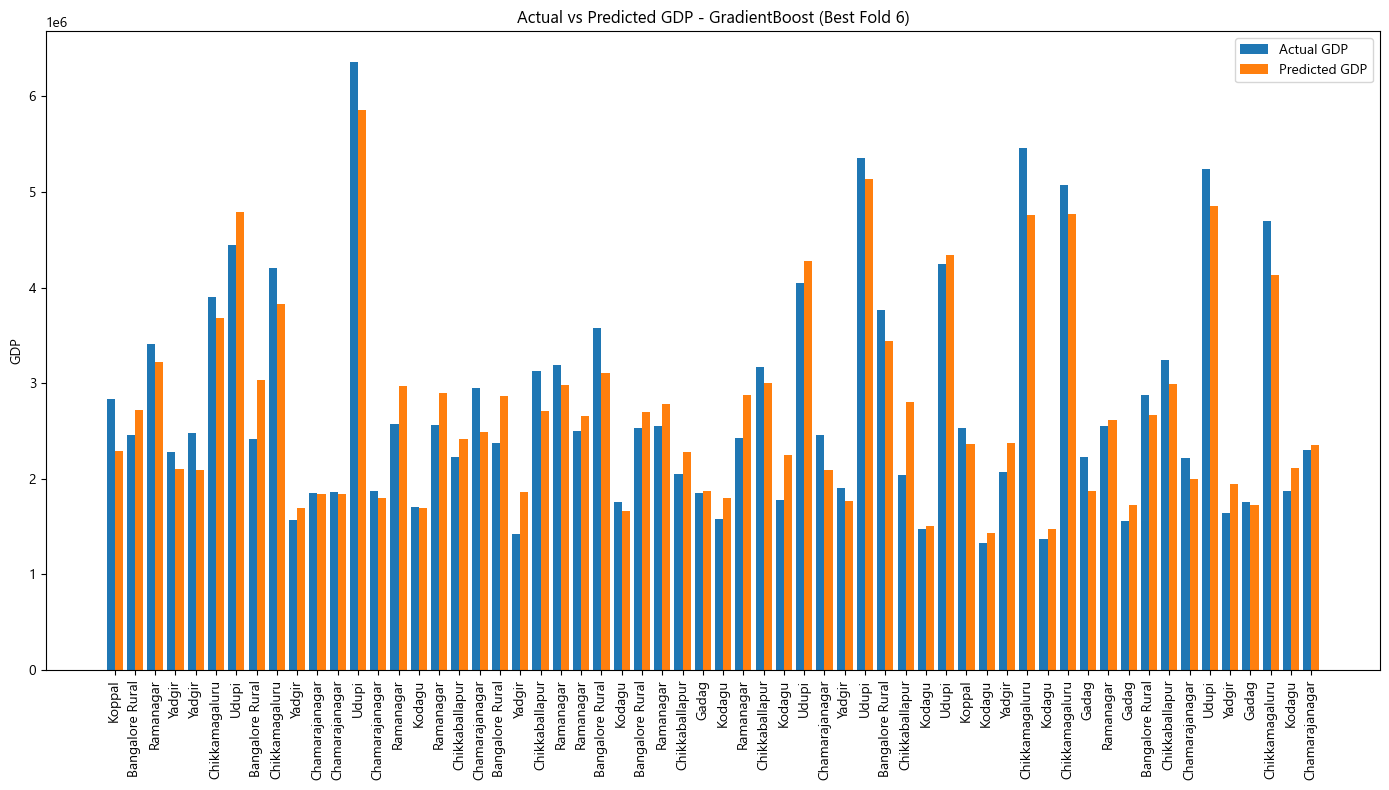

XGBoost: Best Fold = 5 with R2 Score = 0.9431


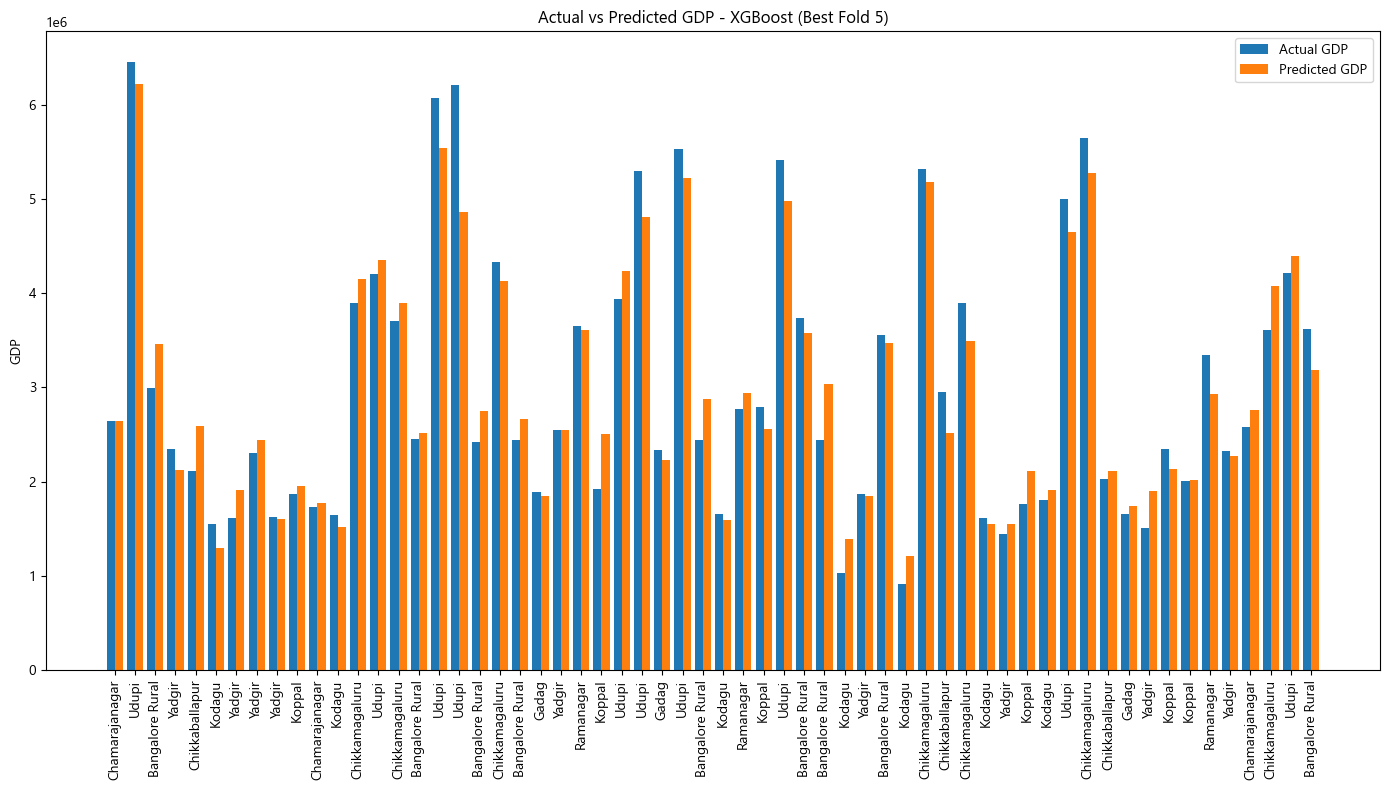

AdaBoost: Best Fold = 8 with R2 Score = 0.8813


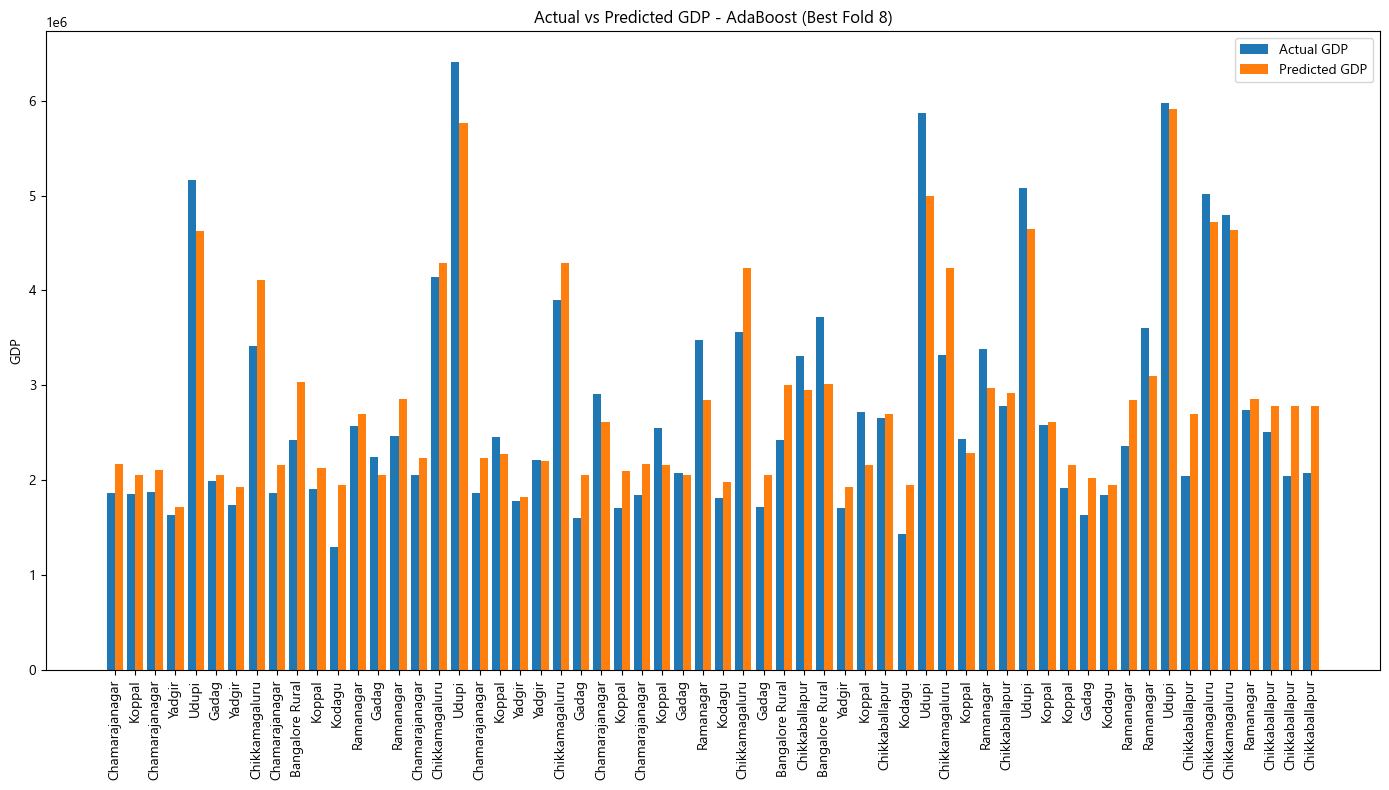

ExtraTrees: Best Fold = 3 with R2 Score = 0.9486


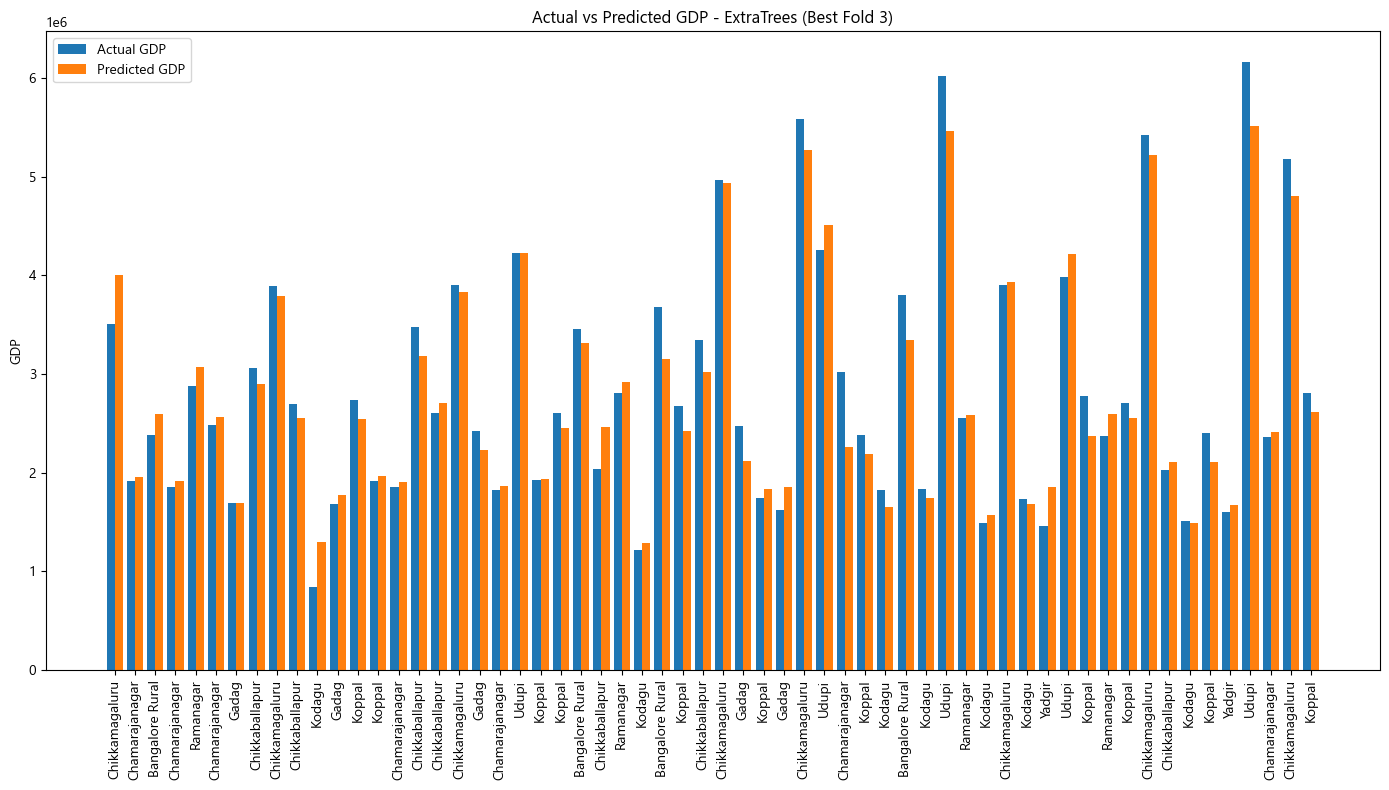


Summary of Model Results:
           Model  Mean_R2_Score
0   RandomForest       0.891748
1  GradientBoost       0.889535
2        XGBoost       0.891465
3       AdaBoost       0.830740
4     ExtraTrees       0.918278


In [47]:
accuracy_cluster(final_merged_df_red)

### Merging The DataSet

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

dataframes_pca = []

for i, df in enumerate(dataframes):
    try:
        # Exclude non-numeric columns
        features = df.iloc[:, 1:].values  

        # Check for NaN or infinite values
        if np.isnan(features).any() or np.isinf(features).any():
            raise ValueError("Data contains NaN or infinite values.")

        # Standardize the data
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)

        # Determine maximum possible components
        max_components = min(scaled_features.shape[0], scaled_features.shape[1])

        # Apply PCA to retain 99% variance
        pca = PCA(n_components=60)
        principal_components = pca.fit_transform(scaled_features)

        # Create DataFrame with actual number of components
        n_components = principal_components.shape[1]
        df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

        # Retain original non-numeric column (if exists)
        df_pca.insert(0, df.columns[0], df.iloc[:, 0].values)

        dataframes_pca.append(df_pca)
        print(f"DataFrame {i}: Selected {n_components} components to retain 99% variance.")

    except Exception as e:
        print(f"Error applying PCA for DataFrame {i}: {e}")


DataFrame 0: Selected 60 components to retain 99% variance.
DataFrame 1: Selected 60 components to retain 99% variance.
DataFrame 2: Selected 60 components to retain 99% variance.
DataFrame 3: Selected 60 components to retain 99% variance.
DataFrame 4: Selected 60 components to retain 99% variance.
DataFrame 5: Selected 60 components to retain 99% variance.
DataFrame 6: Selected 60 components to retain 99% variance.
DataFrame 7: Selected 60 components to retain 99% variance.
DataFrame 8: Selected 60 components to retain 99% variance.
DataFrame 9: Selected 60 components to retain 99% variance.
DataFrame 10: Selected 60 components to retain 99% variance.
DataFrame 11: Selected 60 components to retain 99% variance.
DataFrame 12: Selected 60 components to retain 99% variance.
DataFrame 13: Selected 60 components to retain 99% variance.
DataFrame 14: Selected 60 components to retain 99% variance.
DataFrame 15: Selected 60 components to retain 99% variance.
DataFrame 16: Selected 60 componen

In [20]:
import pandas as pd

# Initialize an empty list to store updated DataFrames
merged_dfs = []

for i, df in enumerate(dataframes_pca):
    
    # Add GDP as a new column
    df = df.copy()
    df['Identity']=i
    df['GDP_Output'] = gdp[districts[i].upper()]
    
    # Append to the list
    merged_dfs.append(df)

# Concatenate all DataFrames into one
final_merged_df = pd.concat(merged_dfs, ignore_index=True)

# Optional: Save to CSV
final_merged_df.to_csv("final_merged_gdp.csv", index=False)


In [21]:
import os
import numpy as np
import pandas as pd
merge_df=pd.read_csv("final_merged_gdp.csv")
merge_df

,District,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,Identity,GDP_Output
0,Bagalkot,-32.458534,-44.050963,-6.159064,-4.936340,-7.461991,5.588229,-12.040000,-6.291836,-10.937132,...,-3.482095,0.175793,1.871007,-1.830481,-1.261360,-0.677534,-0.310739,7.873387e-13,0,3711497.000
1,Bagalkot,-29.968952,-37.327494,-10.297840,-3.922556,-6.612356,4.428931,-7.678854,-1.190055,-7.890150,...,1.095434,2.171130,18.160815,2.368337,70.968409,-1.181033,1.388594,7.873387e-13,0,3732348.250
2,Bagalkot,-26.035271,-21.795772,-6.538870,-11.626070,-11.512364,4.498768,-7.129412,0.883986,-15.200971,...,-5.765367,-4.051311,-17.475089,-18.754712,-14.378774,-2.911779,-4.921649,7.873387e-13,0,3753199.500
3,Bagalkot,-28.281310,-29.645318,-13.636156,-6.777905,-11.336129,0.935545,-10.047053,-1.869680,-8.641787,...,5.368865,1.551790,-5.075859,-0.204403,-5.385558,-1.269157,-2.254358,7.873387e-13,0,3774050.750
4,Bagalkot,-21.872642,-27.375897,-24.109286,2.953246,-12.231504,0.702944,-11.852826,-12.265394,-8.665415,...,-0.360909,-0.341267,-4.623876,-1.366009,-1.562600,0.219848,1.858356,7.873387e-13,0,3794902.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Yadgir,-7.303068,0.141778,-25.449215,-0.022961,10.231125,-41.643072,22.771552,-22.249536,-79.855284,...,-0.358547,0.777737,0.424462,-0.796669,0.337369,0.114672,0.277389,6.041614e-13,29,2450426.833
1796,Yadgir,55.005619,-59.593017,-63.478544,14.480074,-33.798315,-79.134325,180.547197,-23.872882,46.116637,...,-0.437175,-0.543773,0.485554,0.080414,0.176331,-0.183848,-0.603899,6.041614e-13,29,2475437.667
1797,Yadgir,30.104255,-28.603818,-26.876229,-1.903435,6.355237,-22.343271,1.857596,6.080026,-25.547865,...,1.485126,11.107835,5.802368,1.842686,0.353921,0.305898,-0.336679,6.041614e-13,29,2500448.500
1798,Yadgir,21.338275,-19.289305,-11.127898,-6.988040,15.333781,-11.217855,-9.173329,-2.557477,-28.729379,...,1.233478,-16.600153,-10.205581,1.198903,-1.657149,-0.339795,1.001885,6.041614e-13,29,2525459.333


In [22]:
# Shuffle the DataFrame
merge_df = merge_df.sample(frac=1, random_state=42).reset_index(drop=True)
merge_df

,District,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,Identity,GDP_Output
0,Tumkur,-61.386513,-0.500983,6.492563,-3.274442,11.220766,-3.694035,8.337319,-5.371271,-1.473576,...,-5.565986,-1.283394,-1.569472,-2.558436,-0.392054,0.016113,4.639882e-13,-2.519219e-14,26,6.961007e+06
1,Hassan,-4.011712,-1.435947,-0.274832,3.542768,-13.953997,8.431046,14.089366,48.163927,-21.643940,...,-0.290804,-0.247965,0.130488,-0.087419,-0.320690,0.262066,1.796265e-13,7.168629e-15,15,5.029152e+06
2,Gadag,2.862606,-0.358947,14.403206,-16.811486,-1.431140,10.883457,-7.202508,6.772591,-5.439096,...,-0.534473,-0.039020,-0.106118,-0.251567,0.356618,-0.110700,-5.363851e-02,1.553086e-13,14,1.782823e+06
3,Bangalore Urban,-136.193827,28.637286,-13.904104,-14.025118,-30.104059,-2.114459,-12.167326,-46.465629,-30.680466,...,-0.143888,-0.636110,-0.401475,0.064449,-0.114335,0.157986,4.601077e-02,-2.927731e-14,2,7.930732e+07
4,Mandya,-41.230134,-1.782356,2.450676,4.832793,11.938177,0.619949,1.221765,-12.649558,0.739260,...,45.966499,-2.244849,-19.572888,0.035504,-6.656759,-13.410464,3.241385e-01,-2.884407e-13,21,3.954792e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Kodagu,-2.663071,-1.360290,0.404049,0.787573,-1.256887,3.079086,-20.455121,-7.591516,-17.831131,...,-0.086602,-0.059044,0.000776,-0.069580,-0.058429,0.085243,2.687877e-15,1.360238e-14,18,1.812191e+06
1796,Mandya,-9.067863,-6.010004,-4.408667,-13.344025,0.410611,-15.626560,-2.452659,7.534246,-5.908899,...,1.523663,0.164086,-0.177203,-0.633832,0.050501,-0.683073,3.212300e-01,-2.884407e-13,21,4.653680e+06
1797,Gadag,0.245368,-7.336420,1.851751,-32.310386,36.371311,26.087652,25.211153,29.601088,71.723699,...,0.560285,-0.067689,-0.037811,-0.144844,0.561727,-0.109598,-2.665819e-01,1.553086e-13,14,1.667624e+06
1798,Ramanagar,-68.742873,-0.047854,3.689671,-24.104927,-12.397867,10.328304,-6.971797,-3.477388,1.309451,...,2.987207,-1.460751,-2.010537,-0.646391,-0.580563,-0.426607,-1.683288e-14,3.579296e-15,24,2.560569e+06


RandomForest: Best Fold = 5 with R2 Score = 0.9972


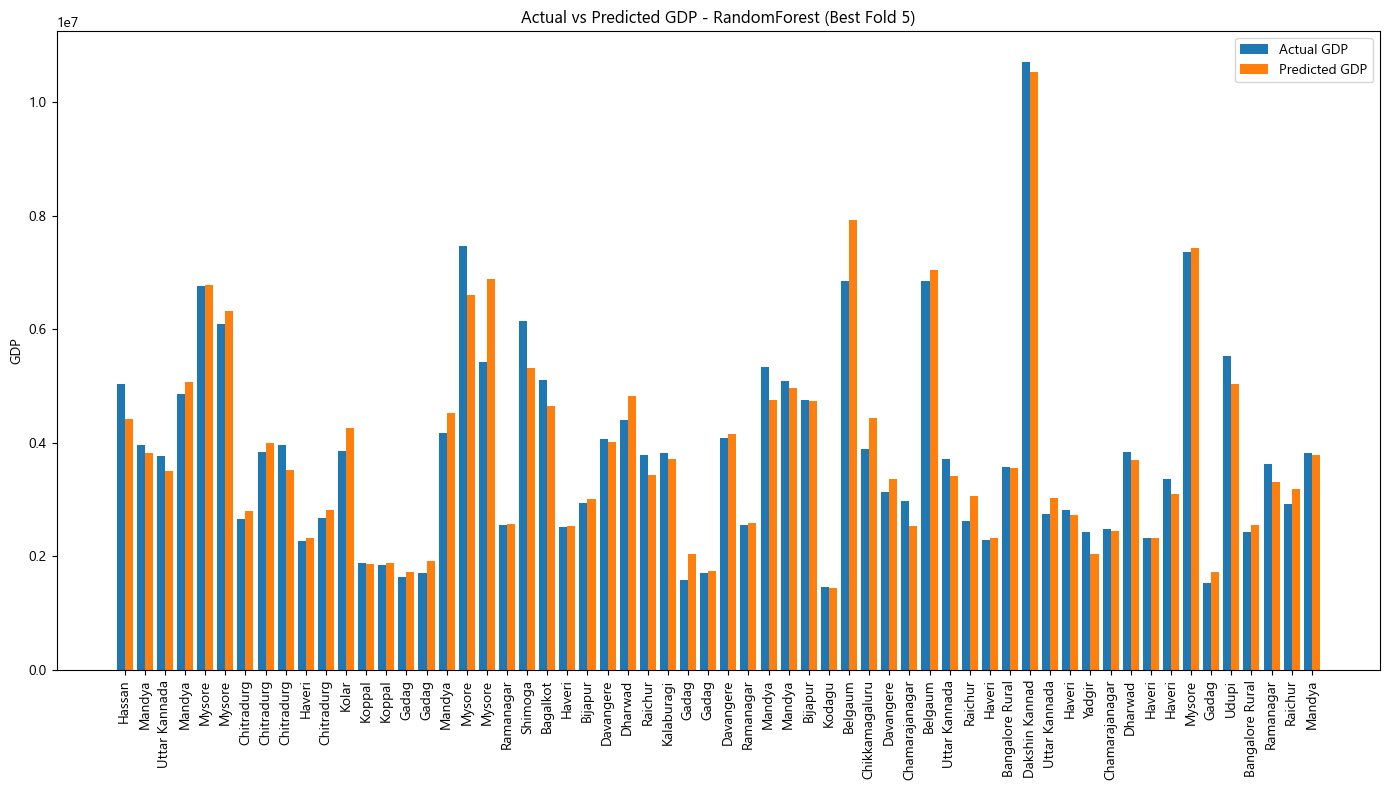

GradientBoost: Best Fold = 5 with R2 Score = 0.9937


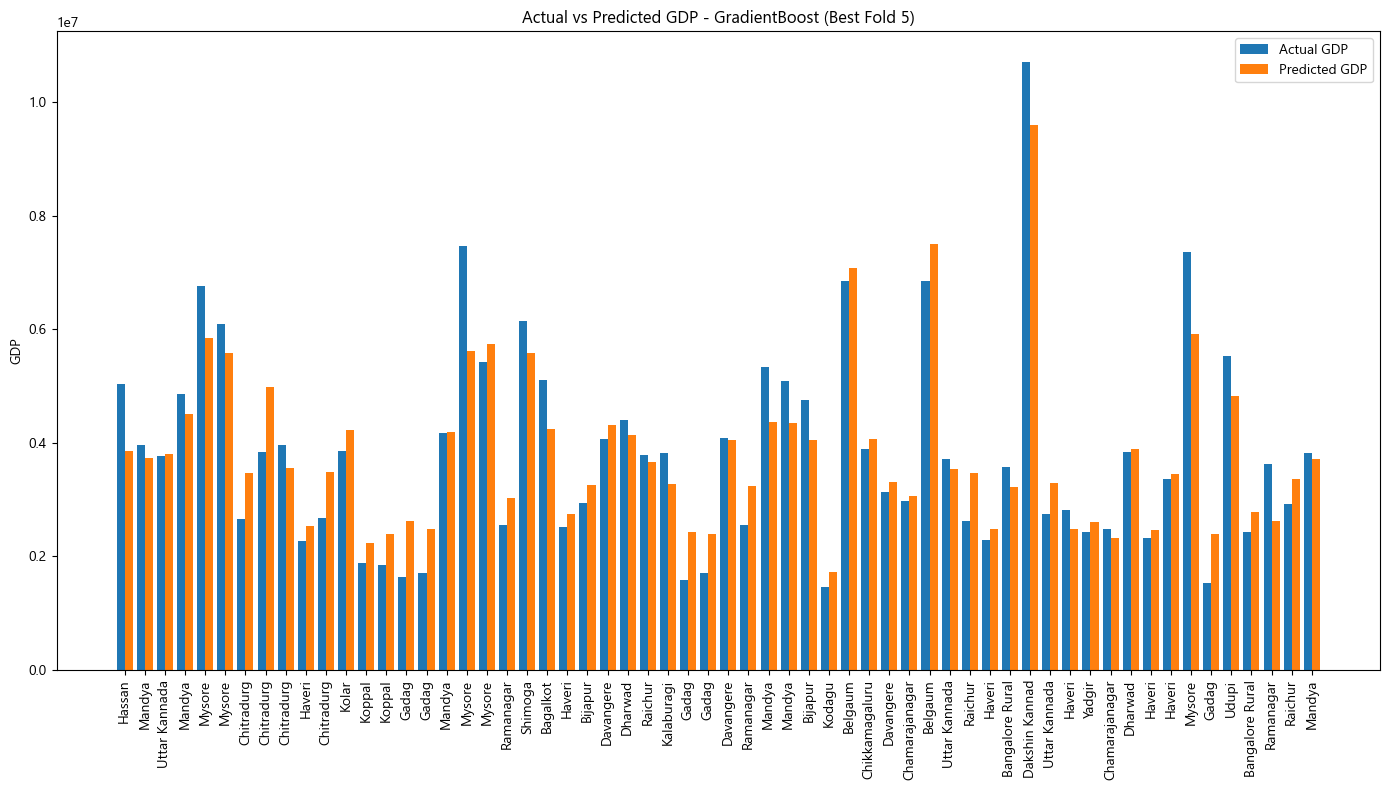

XGBoost: Best Fold = 5 with R2 Score = 0.9935


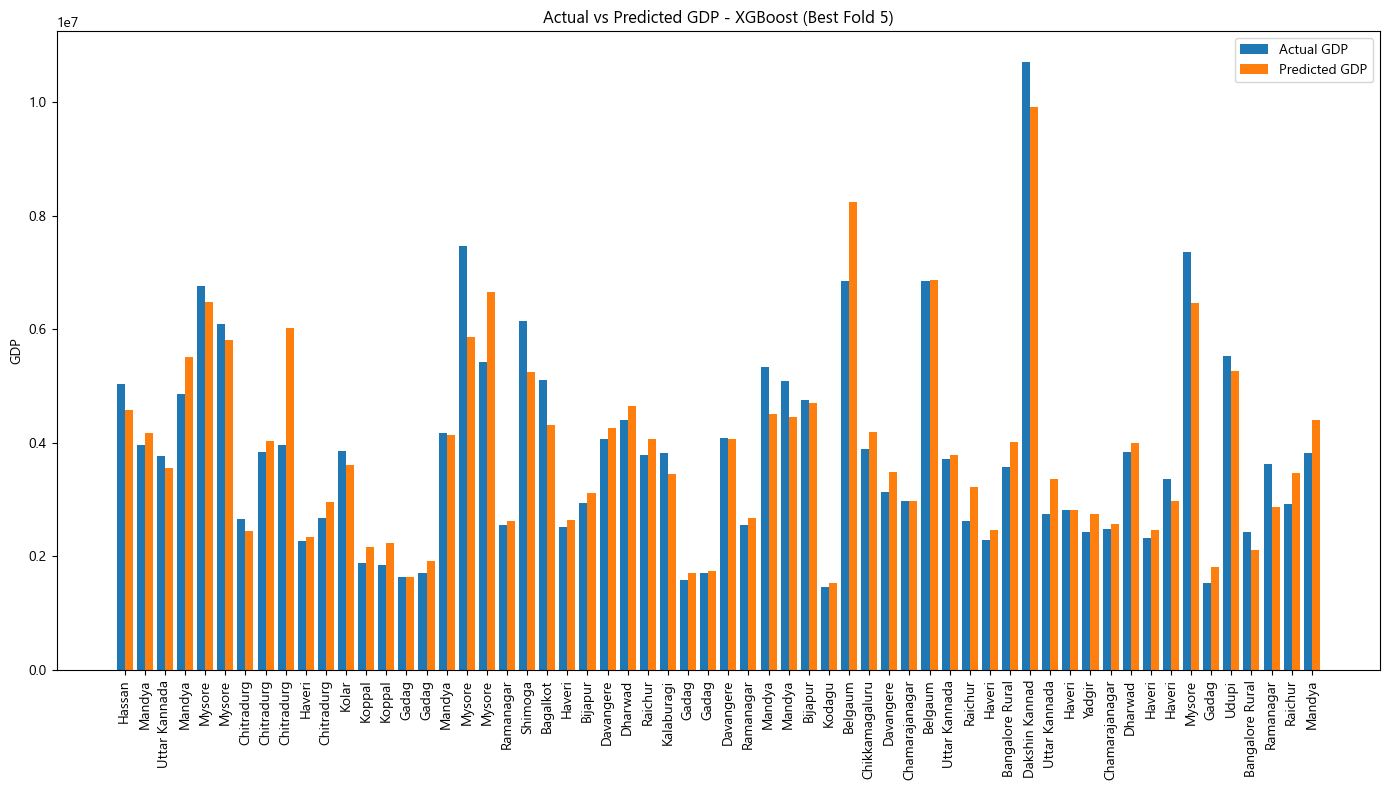

AdaBoost: Best Fold = 5 with R2 Score = 0.9717


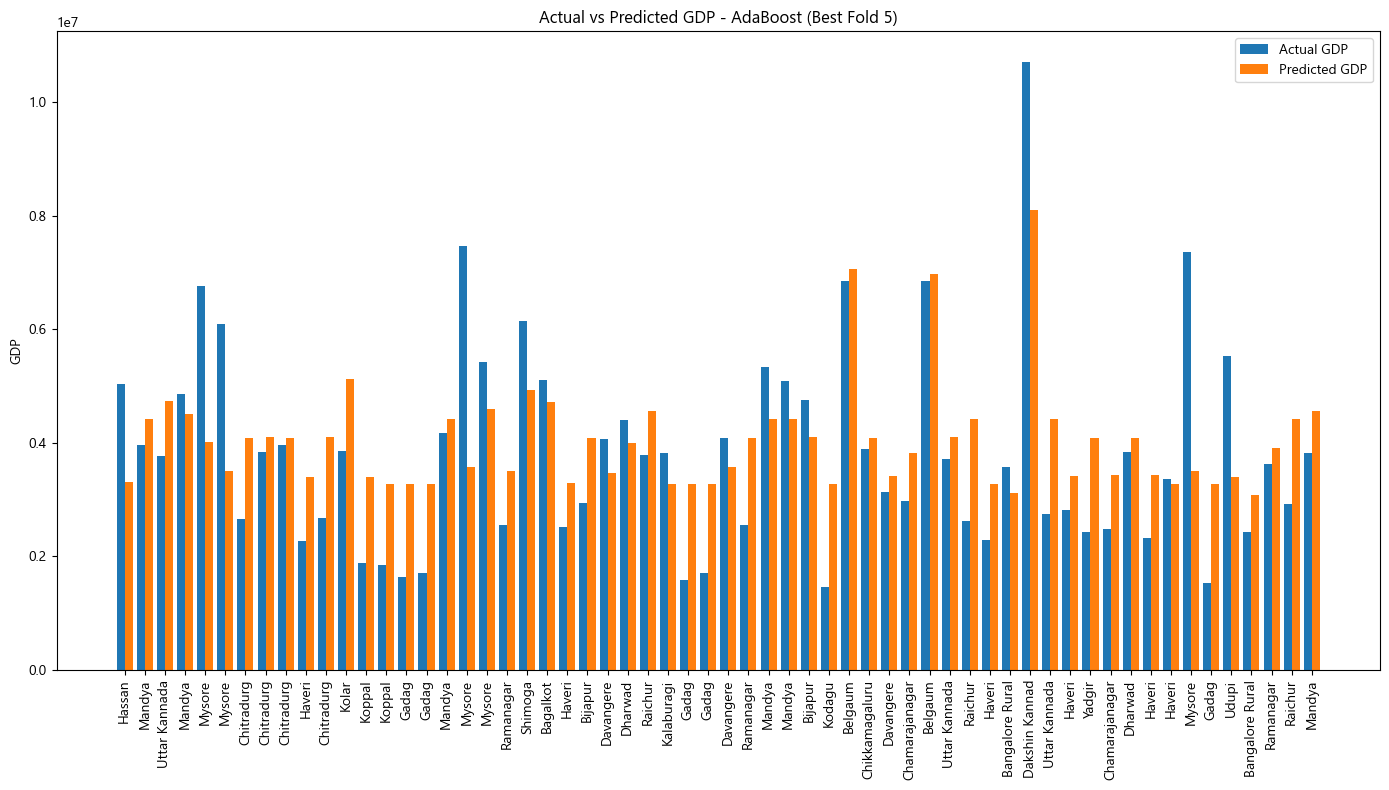

ExtraTrees: Best Fold = 5 with R2 Score = 0.9962


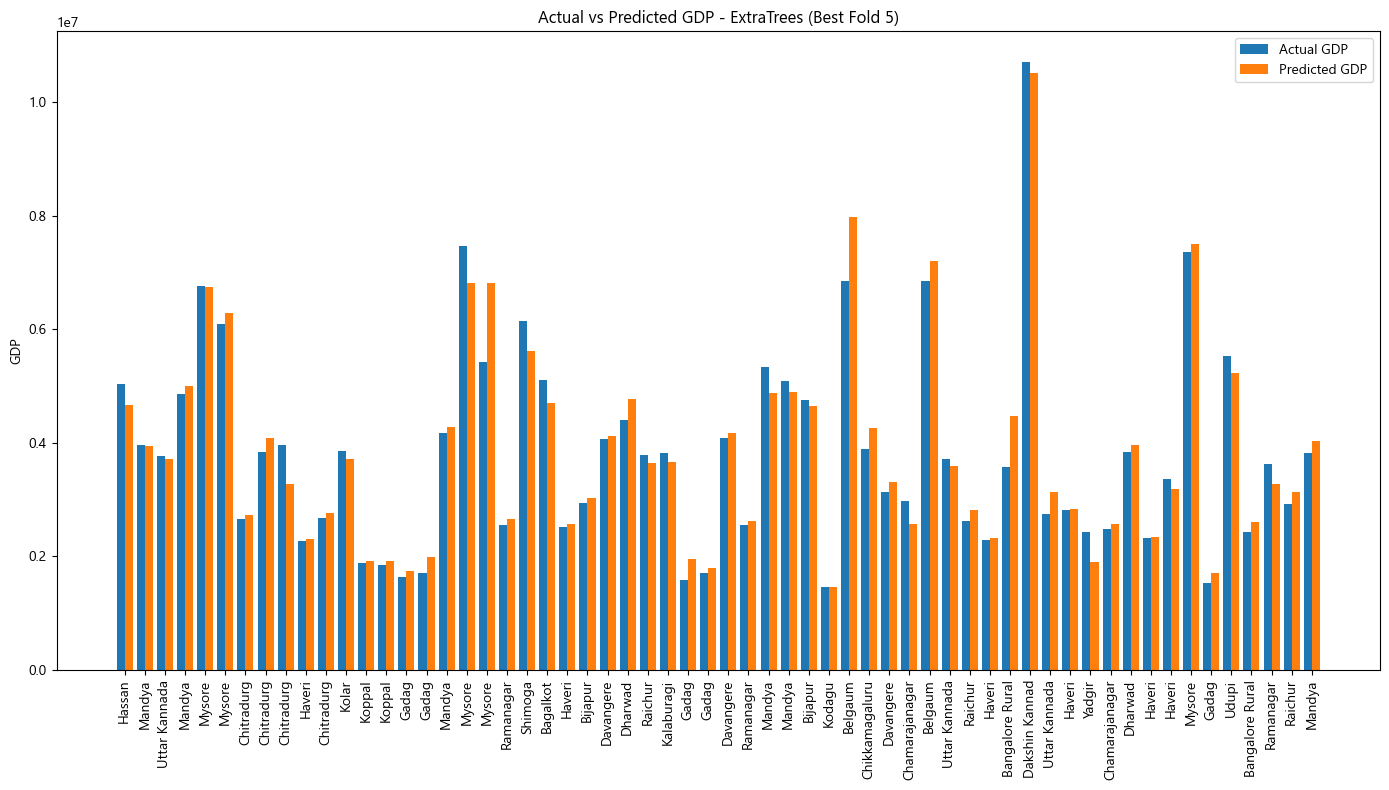


Summary of Model Results:
           Model  Mean_R2_Score
0   RandomForest       0.984687
1  GradientBoost       0.984699
2        XGBoost       0.986986
3       AdaBoost       0.961715
4     ExtraTrees       0.988409


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Features and Target 
X = merge_df.drop(columns=['GDP_Output', 'District'])
y = merge_df['GDP_Output']
states = merge_df['District']

# Dictionary to store model results
model_results = {}

# Limit for the number of bars to display
max_bars = 60

# List of models
models = {
    "RandomForest": RandomForestRegressor(n_jobs=-1, random_state=42),
    "GradientBoost": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42)
}

# K-Fold setup
kf = KFold(n_splits=8, shuffle=True, random_state=102)

# Training and evaluating each model
for model_name, model in models.items():
    try:
        r2_scores = []
        fold_results = {}  # Store predictions and test values for each fold

        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            # Split data
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            states_test = states.iloc[test_idx]

            # Fit the model
            model.fit(X_train, y_train)

            # Predict on test data
            y_pred = model.predict(X_test)

            # Calculate R2 score
            r2 = r2_score(y_test, y_pred)
            r2_scores.append(r2)

            # Store the fold results
            fold_results[fold] = {
                "r2_score": r2,
                "states_test": states_test,
                "y_test": y_test,
                "y_pred": y_pred
            }

        # Find the fold with maximum R2 score
        best_fold = max(fold_results, key=lambda x: fold_results[x]["r2_score"])
        best_fold_data = fold_results[best_fold]
        
        print(f"{model_name}: Best Fold = {best_fold + 1} with R2 Score = {best_fold_data['r2_score']:.4f}")

        # Limit data to max_bars
        limited_states = best_fold_data["states_test"][:max_bars]
        limited_y_test = best_fold_data["y_test"][:max_bars]
        limited_y_pred = best_fold_data["y_pred"][:max_bars]

        # Plot side-by-side bar chart for Actual vs Predicted
        plt.figure(figsize=(14, 8))
        x = np.arange(len(limited_states))
        width = 0.4

        plt.bar(x - width / 2, limited_y_test, width, label="Actual GDP")
        plt.bar(x + width / 2, limited_y_pred, width, label="Predicted GDP")

        plt.ylabel("GDP")
        plt.title(f"Actual vs Predicted GDP - {model_name} (Best Fold {best_fold + 1})")
        plt.xticks(ticks=x, labels=limited_states, rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Store the average R2 score across all folds
        avg_r2 = np.mean(r2_scores)
        model_results[model_name] = {"Mean_R2_Score": avg_r2}

    except Exception as e:
        print(f"Error with {model_name}: {e}")

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(model_results, orient='index').reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

print("\nSummary of Model Results:")
print(results_df)


In [ ]:
# Optional: Save the results to a CSV
#results_df.to_csv("ML_Model_Results_Merge.csv", index=False)